# Import 

In [1]:
# Importing the libraries  

import os
import sys
import json
import csv
import calendar
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from termcolor import colored
from gboml import GbomlGraph
from gboml.compiler.classes import Expression 
import argparse 
from statistics import mean
import seaborn  
import matplotlib.colors as mcolors
import matplotlib
from IPython.display import display

# Add the directory containing GBOML_function to the Python path
# sys.path.append(os.path.abspath('C:/Users/Administrateur/Desktop/Master-thesis_Younès/OneDrive/Bureau/Master Thesis/'))
sys.path.append(os.path.abspath('C:/Users/yaita/OneDrive/Bureau/Master Thesis/'))

import GBOML_function as gf

sys.path.append(os.path.abspath('C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/'))

import process_funct as pf

In [2]:
current_dir = os.getcwd() 
results_folder = os.path.join(current_dir, "Results")
plot_folder = os.path.join(current_dir, "Plots")

In [3]:
# Import all the JSON files and transform them into dictionaries

# Bel_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "2050_Belgium_model_base_case_efuels_and_17TWh_demand.json"))))
# Bel_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "2050_Belgium_model_base_case_efuels_and_flat_demand_7days.json"))))
Bel_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "2050_Belgium_model_base_case_efuels_and_flat_demand_1years.json"))))
base_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "3_clusters_Belgium_base_case1year.json"))))

Bel_cluster_dict = dict()
base_cluster_dict = dict()
# name_file = '2050_Belgium_model_base_case_efuels_and_17TWh_demand.json' 
# name_file = '2050_Belgium_model_base_case_efuels_and_flat_demand_7days.json' 
name_file = '2050_Belgium_model_base_case_efuels_and_flat_demand_1years.json' 

file_path = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file  # path to the json file
with open (file_path, 'r') as myfile:
    data = myfile.read() 
Bel_cluster_dict = json.loads(data) 
        


name_file_base = '3_clusters_Belgium_base_case1year.json'
file_path_base = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file_base  # path to the json file
with open (file_path_base, 'r') as myfile:
    data_base = myfile.read()
base_cluster_dict = json.loads(data_base)

# scenarios = ['base_case']
# sensitive = ['0']
# Bel_cluster_dict = dict()

# for scenario in scenarios:
#     Bel_cluster_dict[scenario] = dict()
#     for value in sensitive:
#         name_file = '2050_Belgium_model_base_case_efuels_and_17TWh_demand.json' 
#         file_path = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file  # path to the json file
#         with open (file_path, 'r') as myfile:
#             data = myfile.read() 
#         dictionary = json.loads(data)
#         Bel_cluster_dict[scenario][value] = {}
#         Bel_cluster_dict[scenario][value] = dictionary

# name_capacity = "name_capacity" # name used for the variable for the capacity of each node
# name_capacity_0 = "pre_installed_capacity" # name used for the parameter used for the installed capacity
# name_capacity_max = "max_capacity" # name used for the parameter for capacity max
# name_capacity_power = "name_capacity_power" # name used for the variable for the capacity of each node
# name_capacity_0_power = "pre_installed_capacity_power" # name used for the parameter used for the installed capacity
# name_capacity_max_power = "max_capacity_power" # name used for the parameter for capacity max
# name_capacity_energy = "name_capacity_energy"
# name_capacity_0_energy = "pre_installed_capacity_energy"
# name_capacity_max_energy = "max_capacity_energy"

In [4]:
time_horizon = Bel_cluster.model.horizon 

# Example for functions

### Process functions to manipulate the Belgian model

In [5]:
to_show = 'no'
to_show = 'yes' # to show the plots or not

In [6]:
# 1: Exemple of 'get_cluster_variable(node,variable,dictionary)'
print(colored('1: get_cluster_variable(node,variable,dictionary):', 'green')) if to_show == 'yes' else None
variable_of_a_cluster = pf.get_cluster_variable("INLAND","e_balanced",Bel_cluster_dict)
print(f'The mean PV production in the INLAND cluster is {mean(variable_of_a_cluster["values"])} MWh') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 2: Exemple of 'get_cluster_element_variable(cluster,element,variable,dictionary)'
print(colored('2: get_cluster_element_variable(cluster,element,variable,dictionary):', 'green')) if to_show == 'yes' else None
variable_of_an_element_in_a_cluster = pf.get_cluster_element_variable("INLAND","PV","e_produced",Bel_cluster_dict)
print(f'The mean PV production in the INLAND cluster is {max(variable_of_an_element_in_a_cluster["values"])} MWh') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 3: Exemple of 'get_cluster_parameter(node,parameter,dictionary)'
print(colored('3: get_cluster_parameter(node,parameter,dictionary):', 'green')) if to_show == 'yes' else None
parameter_of_a_cluster = pf.get_cluster_parameter("INLAND","value_of_lost_load_e",Bel_cluster_dict)
print(f'The value_of_lost_load_e in the INLAND cluster is {parameter_of_a_cluster[0]} M€/GWh(e)') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 4: Exemple of 'get_cluster_element_parameter(cluster,element,parameter,dictionary)'
print(colored('4: get_cluster_element_parameter(cluster,element,parameter,dictionary):', 'green')) if to_show == 'yes' else None
parameter_of_an_element_in_a_cluster = pf.get_cluster_element_parameter("INLAND","PV","capex",Bel_cluster_dict)
print(f'The CAPEX of PV in the INLAND cluster is {parameter_of_an_element_in_a_cluster[0]} M€/GW(e)') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 5: Exemple of 'get_all_cluster_names(dictionary)'
print(colored('5: get_all_cluster_names(dictionary):', 'green')) if to_show == 'yes' else None
all_cluster_names = pf.get_all_cluster_names(Bel_cluster_dict)
print(f'The list of all clusters is {all_cluster_names}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 6: Exemple of 'get_all_cluster_subnodes_names(cluster,dictionary)'
print(colored('6: get_all_cluster_subnodes_names(cluster,dictionary):', 'green')) if to_show == 'yes' else None
all_nodes_of_a_cluster = pf.get_all_cluster_subnodes_names('OFFSHORE',Bel_cluster_dict)
print(f'The list of all subnodes of OFFSHORE cluser is {all_nodes_of_a_cluster}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 7: Exemple of 'get_cluster_names_from_variable(variable,dictionary)'
print(colored('7: get_cluster_names_from_variable(variable,dictionary):', 'green')) if to_show == 'yes' else None
cluster_names_from_variable = pf.get_cluster_names_from_variable('e_balanced',Bel_cluster_dict)
print(f'In which clusters, variable "e_balanced" is {cluster_names_from_variable}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 8: Exemple of 'get_cluster_subnodes_names_from_variable(variable,cluster,dictionary)'
print(colored('8: get_cluster_subnodes_names_from_variable(variable,cluster,dictionary):', 'green')) if to_show == 'yes' else None
cluster_subnodes_names_from_variable = pf.get_cluster_subnodes_names_from_variable('e_consumed','INLAND',Bel_cluster_dict)
print(f'In which nodes, variable "e_consumed" is {cluster_subnodes_names_from_variable}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

1: get_cluster_variable(node,variable,dictionary):
The mean PV production in the INLAND cluster is 10.841451641119088 MWh

2: get_cluster_element_variable(cluster,element,variable,dictionary):
The mean PV production in the INLAND cluster is 19.24233494267702 MWh

3: get_cluster_parameter(node,parameter,dictionary):
The value_of_lost_load_e in the INLAND cluster is 3.0 M€/GWh(e)

4: get_cluster_element_parameter(cluster,element,parameter,dictionary):
The CAPEX of PV in the INLAND cluster is 610 M€/GW(e)

5: get_all_cluster_names(dictionary):
The list of all clusters is ['DENMARK', 'DEUTSCHLAND', 'FRANCE', 'HV_OFF_ZB', 'HV_ZB_INL', 'INLAND', 'LUXEMBOURG', 'NETHERLANDS', 'OFFSHORE', 'PIPE_H2_OFF_ZB', 'PIPE_H2_ZB_INL', 'PIPE_NG_ZB_INL', 'UNITED_KINGDOM', 'ZEEBRUGGE']

6: get_all_cluster_subnodes_names(cluster,dictionary):
The list of all subnodes of OFFSHORE cluser is ['BALANCE', 'BATTERIES', 'DESALINATION', 'ELECTROLYSIS_PLANTS', 'FUEL_CELLS', 'H2O_STORAGE', 'H2_STORAGE', 'WIND_OFFSHORE']

In [7]:

# 9: Exemple of 'get_cluster_names_from_parameter(parameter,dictionary)'
print(colored('9: get_cluster_names_from_parameter(parameter,dictionary):', 'green')) if to_show == 'yes' else None
cluster_names_from_parameter = pf.get_cluster_names_from_parameter('value_of_lost_load_h2',Bel_cluster_dict)
print(f'In which nodes, parameter "value_of_lost_load_h2" is {cluster_names_from_parameter}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 10: Exemple of 'get_cluster_subnodes_names_from_parameter(cluster,parameter,dictionary)'
print(colored('10: get_cluster_subnodes_names_from_parameter(cluster,parameter,dictionary):', 'green')) if to_show == 'yes' else None
cluster_subnodes_names_from_parameter = pf.get_cluster_subnodes_names_from_parameter('INLAND','electricity_required_for_H2',Bel_cluster_dict)
print(f'In which nodes, parameter "electricity_required_for_H2" is {cluster_subnodes_names_from_parameter}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 11: Exemple of 'get_cluster_capacities_from_nodes(nodes,name_capacity,name_capacity_0,name_capacity_max,dictionary)'
print(colored('11: get_cluster_capacities_from_nodes(nodes,name_capacity,name_capacity_0,name_capacity_max,dictionary):', 'green')) if to_show == 'yes' else None
name_capacity = "new_capacity" # name used for the variable for the capacity of each node
name_capacity_0 = "pre_installed_capacity" # name used for the parameter used for the installed capacity
name_capacity_max = "max_capacity" # name used for the parameter for capacity max
cluster_names_capacities = pf.get_cluster_names_from_parameter('fom',Bel_cluster_dict)
cluster_capacities_from_nodes = pf.get_cluster_capacities_from_nodes(cluster_names_capacities,Bel_cluster_dict)

for node in cluster_names_capacities:
    print(f'The capacities of {node} are {cluster_capacities_from_nodes[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 12: Exemple of 'get_cluster_subnodes_names_from_parameter(cluster,parameter,dictionary)'
print(colored('12: get_cluster_subnodes_names_from_parameter(cluster,parameter,dictionary):', 'green')) if to_show == 'yes' else None
cluster_subnodes_names_from_parameter = pf.get_cluster_subnodes_names_from_parameter('INLAND','electricity_required_for_H2',Bel_cluster_dict)
print(f'In which nodes, parameter "electricity_required_for_H2" is {cluster_subnodes_names_from_parameter}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 13: Exemple of 'get_cluster_capacities_from_nodes(nodes,name_capacity,name_capacity_0,name_capacity_max,dictionary)'
print(colored('13: get_cluster_capacities_from_nodes(nodes,name_capacity,name_capacity_0,name_capacity_max,dictionary):', 'green')) if to_show == 'yes' else None
cluster_names_capacities = pf.get_cluster_names_from_parameter('fom',Bel_cluster_dict)
cluster_capacities_from_nodes = pf.get_cluster_capacities_from_nodes(cluster_names_capacities,Bel_cluster_dict)
for node in cluster_names_capacities:
    print(f'The capacities of {node} are {cluster_capacities_from_nodes[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


9: get_cluster_names_from_parameter(parameter,dictionary):
In which nodes, parameter "value_of_lost_load_h2" is ['INLAND']

10: get_cluster_subnodes_names_from_parameter(cluster,parameter,dictionary):
In which nodes, parameter "electricity_required_for_H2" is ['SMR']

11: get_cluster_capacities_from_nodes(nodes,name_capacity,name_capacity_0,name_capacity_max,dictionary):
The capacities of HV_OFF_ZB are {'Preinstalled capacity': 2.3, 'Added capacity': 4.39810295643464, 'Total capacity': 6.6981029564346395, 'Max capacity': 100}
The capacities of HV_ZB_INL are {'Preinstalled capacity': 3, 'Added capacity': 3.682177618695295, 'Total capacity': 6.682177618695295, 'Max capacity': 100}
The capacities of PIPE_H2_OFF_ZB are {'Preinstalled capacity': 0, 'Added capacity': 0, 'Total capacity': 0, 'Max capacity': 'Not given'}
The capacities of PIPE_H2_ZB_INL are {'Preinstalled capacity': 0, 'Added capacity': 0, 'Total capacity': 0, 'Max capacity': 'Not given'}
The capacities of PIPE_NG_ZB_INL are {

In [8]:
# 14: Exemple of 'get_cluster_subnodes_capacities_from_nodes(nodes,cluster,name_capacity,name_capacity_0,name_capacity_max,dictionary)'
print(colored('14: get_cluster_subnodes_capacities_from_nodes(nodes,cluster,name_capacity,name_capacity_0,name_capacity_max,dictionary):', 'green')) if to_show == 'yes' else None
nodes = pf.get_all_cluster_subnodes_names('OFFSHORE',Bel_cluster_dict)
cluster_subnodes_capacities_from_nodes = pf.get_cluster_subnodes_capacities_from_nodes(nodes,'OFFSHORE',Bel_cluster_dict)
for node in nodes:
    print(f'The capacities of {node} are {cluster_subnodes_capacities_from_nodes[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

# 14 bis: Exemple of 'get_cluster_subnodes_total_capacities_from_nodes(nodes,cluster,name_capacity,name_capacity_0,name_capacity_max,dictionary)'
print(colored('14 bis: get_cluster_subnodes_total_capacities_from_nodes(nodes,cluster,name_capacity,name_capacity_0,name_capacity_max,dictionary):', 'green')) if to_show == 'yes' else None
nodes = pf.get_all_cluster_subnodes_names('OFFSHORE',Bel_cluster_dict)
cluster_subnodes_capacities_from_nodes = pf.get_cluster_subnodes_total_capacities_from_nodes(nodes,'OFFSHORE',Bel_cluster_dict)
for node in nodes:
    print(f'The total capacities of {node} are {cluster_subnodes_capacities_from_nodes[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

# 15: Exemple of 'get_cluster_subnodes_capacities_from_storage(nodes,cluster,name_capacity_power,name_capacity_0_power,name_capacity_max_power,name_capacity_energy,name_capacity_0_energy,name_capacity_max_energy,dictionary)'
print(colored('15: get_cluster_subnodes_capacities_from_storage(nodes,cluster,name_capacity,name_capacity_0,name_capacity_max,dictionary):', 'green')) if to_show == 'yes' else None
nodes = pf.get_all_cluster_subnodes_names('OFFSHORE',Bel_cluster_dict)
cluster_subnodes_capacities_from_storage = pf.get_cluster_subnodes_capacities_from_storage(nodes,'OFFSHORE',Bel_cluster_dict)
for node in nodes:
    print(f'The capacities of {node} are for Power {cluster_subnodes_capacities_from_storage[node + " power"]} and for energy {cluster_subnodes_capacities_from_storage[node + " energy"]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 16: Exemple of 'get_cluster_subnodes_technology_costs_from_nodes(nodes,cluster,e_produced,conversion_efficiency,fuel_cost,dictionary)'
print(colored('16: get_cluster_subnodes_technology_costs_from_nodes(nodes,cluster,e_produced,conversion_efficiency,fuel_cost,dictionary):', 'green'))  if to_show == 'yes' else None
nodes = pf.get_cluster_subnodes_names_from_variable('e_consumed','INLAND',Bel_cluster_dict)
cluster_subnodes_technology_costs_from_nodes = pf.get_cluster_subnodes_technology_costs_from_nodes(nodes,'INLAND','e_consumed','conversion_efficiency','fuel_cost',Bel_cluster_dict)
for node in nodes:
    print(f'The technology costs of {node} are {cluster_subnodes_technology_costs_from_nodes[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


14: get_cluster_subnodes_capacities_from_nodes(nodes,cluster,name_capacity,name_capacity_0,name_capacity_max,dictionary):
The capacities of BALANCE are {'Preinstalled capacity': 0, 'Added capacity': 0, 'Total capacity': 0, 'Max capacity': 'Not given'}
The capacities of BATTERIES are {'Preinstalled capacity': 0, 'Added capacity': 0, 'Total capacity': 0, 'Max capacity': 'Not given'}
The capacities of DESALINATION are {'Preinstalled capacity': 0, 'Added capacity': 0.02908727487474934, 'Total capacity': 0.02908727487474934, 'Max capacity': 'Not given'}
The capacities of ELECTROLYSIS_PLANTS are {'Preinstalled capacity': 0, 'Added capacity': 0.3456198058750132, 'Total capacity': 0.3456198058750132, 'Max capacity': 100}
The capacities of FUEL_CELLS are {'Preinstalled capacity': 0.0, 'Added capacity': 0.0, 'Total capacity': 0.0, 'Max capacity': 100}
The capacities of H2O_STORAGE are {'Preinstalled capacity': 0, 'Added capacity': 0, 'Total capacity': 0, 'Max capacity': 'Not given'}
The capaciti

In [9]:
# 17: Exemple of 'get_total_value_of_variables_in_cluster_subnodes(variables,cluster,nodes,dictionary)'
print(colored('17: get_total_value_of_variables_in_cluster_subnodes(variables,cluster,nodes,dictionary):', 'green')) if to_show == 'yes' else None 
nodes = pf.get_cluster_subnodes_names_from_variable('e_consumed','INLAND',Bel_cluster_dict)
variables = ['e_consumed','e_produced']
total_value_of_variables_in_cluster_subnodes = pf.get_total_value_of_variables_in_cluster_subnodes(variables,'INLAND',nodes,Bel_cluster_dict)
for node in nodes:
    print(f'The total value of {node} is {total_value_of_variables_in_cluster_subnodes[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

# 18: Exemple of 'get_total_value_of_global_parameters(parameters,dictionary)'
print(colored('18: get_total_value_of_global_parameters(parameters,dictionary):', 'green'))  if to_show == 'yes' else None
parameters = ['wacc']
total_value_of_global_parameters = pf.get_total_value_of_global_parameters(parameters,Bel_cluster_dict)
print(f'The total value : {total_value_of_global_parameters}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 19: Exemple of 'get_capacity_factors_from_capacity(variable,cluster,nodes,capacities,dictionary)'
print(colored('19: get_capacity_factors_from_capacity(variable,cluster,nodes,capacities,dictionary):', 'green')) if to_show == 'yes' else None 
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
variables = ['e_consumed','e_produced']
capacities = pf.get_cluster_subnodes_total_capacities_from_nodes(nodes,'INLAND',Bel_cluster_dict)
capacity_factors_from_capacity = pf.get_capacity_factors_from_capacity('e_produced', 'INLAND', nodes, capacities, Bel_cluster_dict)
for node in nodes:
    print(f'The total value of {node} is {capacity_factors_from_capacity[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

17: get_total_value_of_variables_in_cluster_subnodes(variables,cluster,nodes,dictionary):
The total value of BIOETH_PLANTS is {'e_consumed': 0.0, 'e_produced': 0}
The total value of BIOMETHANE is {'e_consumed': 844.8311688312598, 'e_produced': 0}
The total value of CELLETH_PLANTS is {'e_consumed': 0.0, 'e_produced': 0}
The total value of DAC is {'e_consumed': 1845.5125133461434, 'e_produced': 0}
The total value of DME_PLANTS is {'e_consumed': 0.0, 'e_produced': 0}
The total value of ELECTROLYSIS_PLANTS is {'e_consumed': 0.0, 'e_produced': 0}
The total value of ETH_PLANTS is {'e_consumed': 0.0, 'e_produced': 0}
The total value of H2_STORAGE is {'e_consumed': 15.718572357301992, 'e_produced': 0}
The total value of PCCC_BM is {'e_consumed': 0.0, 'e_produced': 0}
The total value of PCCC_CCGT is {'e_consumed': 5537.181531598008, 'e_produced': 0}
The total value of PCCC_CHP is {'e_consumed': 0.0, 'e_produced': 0}
The total value of PCCC_DME is {'e_consumed': 0.0, 'e_produced': 0}
The total v

In [10]:
# 20: Exemple of 'get_capex_from_cluster_subnodes_capacity(cluster,capex_name,capacities,dictionary)'
print(colored('20: get_capex_from_cluster_subnodes_capacity(cluster,capex_name,capacities,dictionary):', 'green'))  if to_show == 'yes' else None
# nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
variables = ['e_consumed','e_produced']
capacities = pf.get_cluster_subnodes_capacities_from_nodes(nodes,'INLAND',Bel_cluster_dict)
capex_from_cluster_subnodes_capacity = pf.get_capex_from_cluster_subnodes_capacity('INLAND', 'capex', capacities, Bel_cluster_dict)
for node in nodes:
    print(f'The CAPEX of {node} is {capex_from_cluster_subnodes_capacity[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 21: Exemple of 'get_fom_from_cluster_subnodes_capacity(cluster,fom_name,capacities,dictionary)'
print(colored('21: get_fom_from_cluster_subnodes_capacity(cluster,fom_name,capacities,dictionary):', 'green'))  if to_show == 'yes' else None
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
capacities = pf.get_cluster_subnodes_capacities_from_nodes(nodes,'INLAND',Bel_cluster_dict)
fom_from_cluster_subnodes_capacity = pf.get_fom_from_cluster_subnodes_capacity('INLAND', 'fom', capacities, Bel_cluster_dict)
for node in nodes:
    print(f'The FOM of {node} is {fom_from_cluster_subnodes_capacity[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 22: Exemple of 'get_vom_from_cluster_subnodes_variable(cluster,vom_name,variable,nodes,dictionary)'
print(colored('22: get_vom_from_cluster_subnodes_variable(cluster,vom_name,variable,nodes,dictionary):', 'green'))  if to_show == 'yes' else None
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
capacities = pf.get_cluster_subnodes_capacities_from_nodes(nodes,'INLAND',Bel_cluster_dict)
vom_from_cluster_subnodes_capacity = pf.get_vom_from_cluster_subnodes_variable('INLAND', 'vom','e_produced', capacities, Bel_cluster_dict)
for node in nodes:
    print(f'The VOM of {node} is {vom_from_cluster_subnodes_capacity[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

20: get_capex_from_cluster_subnodes_capacity(cluster,capex_name,capacities,dictionary):
The CAPEX of BIOMASS is {'Capex': 1700, 'Added capacity': 0.0, 'Installation cost': 0.0}
The CAPEX of CCGT is {'Capex': 750, 'Added capacity': 10.736032506172714, 'Installation cost': 8052.024379629535}
The CAPEX of CHP is {'Capex': 850, 'Added capacity': 0.0, 'Installation cost': 0.0}
The CAPEX of FUEL_CELLS is {'Capex': 2668, 'Added capacity': 0.0, 'Installation cost': 0.0}
The CAPEX of NUCLEAR is {'Capex': 4700, 'Added capacity': 0.0, 'Installation cost': 0.0}
The CAPEX of OCGT is {'Capex': 412, 'Added capacity': 0.0, 'Installation cost': 0.0}
The CAPEX of PV is {'Capex': 610, 'Added capacity': 50.0, 'Installation cost': 30500.0}
The CAPEX of WASTE is {'Capex': 1997, 'Added capacity': 0.0, 'Installation cost': 0.0}
The CAPEX of WIND_ONSHORE is {'Capex': 943, 'Added capacity': 9.0, 'Installation cost': 8487.0}

21: get_fom_from_cluster_subnodes_capacity(cluster,fom_name,capacities,dictionary):
The

In [11]:

# 23: Exemple of 'get_total_cluster_subnodes_cost(capex_dict,fom_dict,vom_dict)'
print(colored('23: get_total_cluster_subnodes_cost(capex_dict,fom_dict,vom_dict):', 'green'))  if to_show == 'yes' else None
total_cluster_subnodes_cost = pf.get_total_cluster_subnodes_cost(capex_from_cluster_subnodes_capacity, fom_from_cluster_subnodes_capacity, vom_from_cluster_subnodes_capacity)
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
for node in nodes:
    print(f'The total cost of {node} is {total_cluster_subnodes_cost[node]}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 24: Exemple of 'get_cluster_objective(cluster, objective_elem,dictionary)'
print(colored('24: get_cluster_objective(cluster, objective_elem,dictionary):', 'green'))  if to_show == 'yes' else None
cluster_objective = pf.get_cluster_objective('INLAND', 'cost_e_ens', Bel_cluster_dict)
print(f'The objective of INLAND cluster is {cluster_objective}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 25: Exemple of 'get_objective_element(cluster,subnode,objective_elem,dictionary)'
print(colored('25: get_objective_element(cluster,subnode,objective_elem,dictionary):', 'green')) if to_show == 'yes' else None 
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
for node in nodes:
    cluster_objective = pf.get_objective_element('INLAND', node, 'fix_cost', Bel_cluster_dict)
    print(f'The objective of {node} is {cluster_objective}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None



23: get_total_cluster_subnodes_cost(capex_dict,fom_dict,vom_dict):
The total cost of BIOMASS is {'Total capacity': 0.0, 'Installation cost': 0.0, 'Fixed OM cost': 0.0, 'Variable OM cost': 0.0, 'Total Cost': 0.0}
The total cost of CCGT is {'Total capacity': 10.736032506172714, 'Installation cost': 8052.024379629535, 'Fixed OM cost': 161.04048759259072, 'Variable OM cost': 91.16678147820824, 'Total Cost': 8304.231648700335}
The total cost of CHP is {'Total capacity': 0.0, 'Installation cost': 0.0, 'Fixed OM cost': 0.0, 'Variable OM cost': 0.0, 'Total Cost': 0.0}
The total cost of FUEL_CELLS is {'Total capacity': 0.0, 'Installation cost': 0.0, 'Fixed OM cost': 0.0, 'Variable OM cost': 0.0, 'Total Cost': 0.0}
The total cost of NUCLEAR is {'Total capacity': 0.0, 'Installation cost': 0.0, 'Fixed OM cost': 0.0, 'Variable OM cost': 0.0, 'Total Cost': 0.0}
The total cost of OCGT is {'Total capacity': 0.0, 'Installation cost': 0.0, 'Fixed OM cost': 0.0, 'Variable OM cost': 0.0, 'Total Cost': 0.0

In [12]:

# 26: Exemple of 'get_duals_from_hyperedge(constraint,hyperedge,dictionary)'
print(colored('26: get_duals_from_hyperedge(constraint,hyperedge,dictionary):', 'green'))  if to_show == 'yes' else None
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
for node in nodes:
    cluster_objective = pf.get_objective_element('INLAND', node, 'fix_cost', Bel_cluster_dict)
    print(f'The objective of {node} is {cluster_objective}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 27: Exemple of 'zoom_on_variable_in_cluster(cluster,variable,zoom,dictionary)'
print(colored('27: zoom_on_variable_in_cluster(cluster,variable,zoom,dictionary):', 'green'))  if to_show == 'yes' else None
variable = 'e_balanced'
zoom_on_variable_in_cluster = pf.zoom_on_variable_in_cluster('INLAND', variable, 'Day', Bel_cluster_dict)
print(f'The zoom on variable {variable} in INLAND cluster is {zoom_on_variable_in_cluster}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 28: Exemple of 'zoom_on_variable_in_cluster_subnode(cluster,variable,node,zoom,dictionary)'
print(colored('28: zoom_on_variable_in_cluster_subnode(cluster,variable,node,zoom,dictionary):', 'green'))  if to_show == 'yes' else None
nodes = pf.get_cluster_subnodes_names_from_variable('e_produced','INLAND',Bel_cluster_dict)
variable = 'e_produced'
for node in nodes:
    zoom_on_variable_in_cluster_subnode = pf.zoom_on_variable_in_cluster_subnode('INLAND', 'e_produced', node, 'Month', Bel_cluster_dict)
    print(f'The zoom on variable {variable} in INLAND cluster is {zoom_on_variable_in_cluster_subnode}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None


# 29: Exemple of 'zoom_on_global_parameter(global_parameter,zoom,dictionary)'
print(colored('29: zoom_on_global_parameter(global_parameter,zoom,dictionary):', 'green'))  if to_show == 'yes' else None
global_parameter = 'wacc'
zoom_on_variable_in_cluster = pf.zoom_on_global_parameter(global_parameter, 'Day', Bel_cluster_dict)
print(f'The zoom on global param {global_parameter} is {zoom_on_variable_in_cluster}') if to_show == 'yes' else None
print('') if to_show == 'yes' else None

26: get_duals_from_hyperedge(constraint,hyperedge,dictionary):
The objective of BIOMASS is 0.0
The objective of CCGT is 809.9241733307211
The objective of CHP is 0.0
The objective of FUEL_CELLS is 0.0
The objective of NUCLEAR is 0.0
The objective of OCGT is 0.0
The objective of PV is 3267.220775230301
The objective of WASTE is 0.0
The objective of WIND_ONSHORE is 836.2738596517889

27: zoom_on_variable_in_cluster(cluster,variable,zoom,dictionary):
The zoom on variable e_balanced in INLAND cluster is [226.30343261010486, 222.3911709619702, 193.11493993996226, 233.6573425590888, 272.66613578274456, 261.177464061612, 270.7781935079029, 251.25571636328755, 261.3947557092625, 218.3454496102486, 238.85016786432024, 278.67333370909546, 285.1592470535129, 298.6953096458121, 289.011415181549, 275.752242116625, 274.94562826100633, 319.5877592135675, 343.5210108817819, 328.8530155214767, 323.586652553281, 299.01432787406736, 271.9649253573194, 235.42418279068195, 192.95679557492832, 205.972264812

# Dictionnary generation

### Functions to have a timeserie from variables or parameters:


    - There is a version where one can provide list of variables or parameters named get_timeseries_dict_from_all_cluster
    - There is a version where one can give only one variable for specific use named get_timeseries_dict

#### Several variables:

In [13]:
print(colored('Several variables given:', 'white', 'on_blue'))
print("")

test_var = pf.get_timeseries_dict_from_all_cluster(Bel_cluster_dict, variable = ['e_produced','e_charged','e_discharged'])
print("")

Several variables given:

Variable: e_produced
cluster: DENMARK: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: DEUTSCHLAND: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: FRANCE: dict_keys(['NUCLEAR', 'PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: INLAND: dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE'])
cluster: LUXEMBOURG: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: NETHERLANDS: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: OFFSHORE: dict_keys(['FUEL_CELLS', 'WIND_OFFSHORE'])
cluster: UNITED_KINGDOM: dict_keys(['NUCLEAR', 'PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: ZEEBRUGGE: dict_keys(['FUEL_CELLS'])

Variable: e_charged
cluster: INLAND: dict_keys(['BATTERIES', 'PUMPED_HYDRO'])
cluster: OFFSHORE: dict_keys(['BATTERIES'])
cluster: ZEEBRUGGE: dict_keys(['BATTERIES'])

Variable: e_discharged
cluster: INLAND: dict_keys(['BATTERIES', 'PUMPED_HYDRO'])
cluster: OFFSHORE: dict

#### Several parameters:

In [14]:
print(colored('Several parameters given:', 'white', 'on_blue'))
print("")

test_par = pf.get_timeseries_dict_from_all_cluster(Bel_cluster_dict, parameter = ['pre_installed_capacity','max_capacity'])
print("")

Several parameters given:

Parameter: pre_installed_capacity
cluster: DENMARK: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: DEUTSCHLAND: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: FRANCE: dict_keys(['NUCLEAR', 'PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: INLAND: dict_keys(['BIOMASS', 'BIOMETHANE', 'CCGT', 'CHP', 'DAC', 'DME_PLANTS', 'ELECTROLYSIS_PLANTS', 'ETH_PLANTS', 'FUEL_CELLS', 'LINEPACK_NG', 'LOAD_SHEDDING_1', 'LOAD_SHEDDING_2', 'LOAD_SHEDDING_4', 'LOAD_SHEDDING_8', 'LOAD_SHEDDING_UNLIM', 'LOAD_SHIFTING', 'METHANATION', 'NUCLEAR', 'OCGT', 'PCCC_BM', 'PCCC_CCGT', 'PCCC_CHP', 'PCCC_DME', 'PCCC_OCGT', 'PCCC_SMR', 'PCCC_WS', 'PV', 'SMR', 'WASTE', 'WIND_ONSHORE'])
cluster: LUXEMBOURG: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: NETHERLANDS: dict_keys(['PV', 'WIND_OFFSHORE', 'WIND_ONSHORE'])
cluster: OFFSHORE: dict_keys(['DESALINATION', 'ELECTROLYSIS_PLANTS', 'FUEL_CELLS', 'WIND_OFFSHORE'])
cluster: UNITED_KINGDOM: dict_keys(['NUCLEAR

#### Specific utilization and how to merge:

In [15]:
print(colored('Specific utilization:', 'white', 'on_blue'))
print("")

elec_prod_inland = pf.get_timeseries_dict(Bel_cluster_dict, variable='e_produced', cluster='INLAND')
print(colored('The variable e_produced for the cluster INLAND:', 'blue'))
print(elec_prod_inland.keys())
print("")

elec_prod_offshore = pf.get_timeseries_dict(Bel_cluster_dict, variable='e_produced', cluster='OFFSHORE')  
print(colored('The variable e_produced for the cluster OFFSHORE:', 'blue'))
print(elec_prod_offshore.keys())
print("")

node_test = pf.merge_dictionaries(elec_prod_inland, elec_prod_offshore)
print(colored('The variable e_produced for the merged cluster OFFSHORE and INLAND:', 'blue'))
print(node_test.keys())
print("")

Specific utilization:

The variable e_produced for the cluster INLAND:
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE'])

The variable e_produced for the cluster OFFSHORE:
dict_keys(['FUEL_CELLS', 'WIND_OFFSHORE'])

The variable e_produced for the merged cluster OFFSHORE and INLAND:
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])



# Plot

### Functions to have plot timeseries:
    

- There is a version where one can change the time step named zoom_with_timestep
- There is a version where one can select a precise time zoom with different time step named precise_zoom_with_timestep

#### To change time step 

- Set zero_nodes = 'yes' to show the nodes with a list of null values
- Set total_plot = 'no' if you do not want to plot the total of all nodes
- Set offset = 'yes' if you want to start xtick with 1 instead of 0
- Set print_skip = 'no' if you do not want to have the printed message in case null list

##### Different time step: ['hour', 'day', 'week', 'month']

Zooming the data:
In day:
✅ Plot saved: plots\elec_prod.pdf


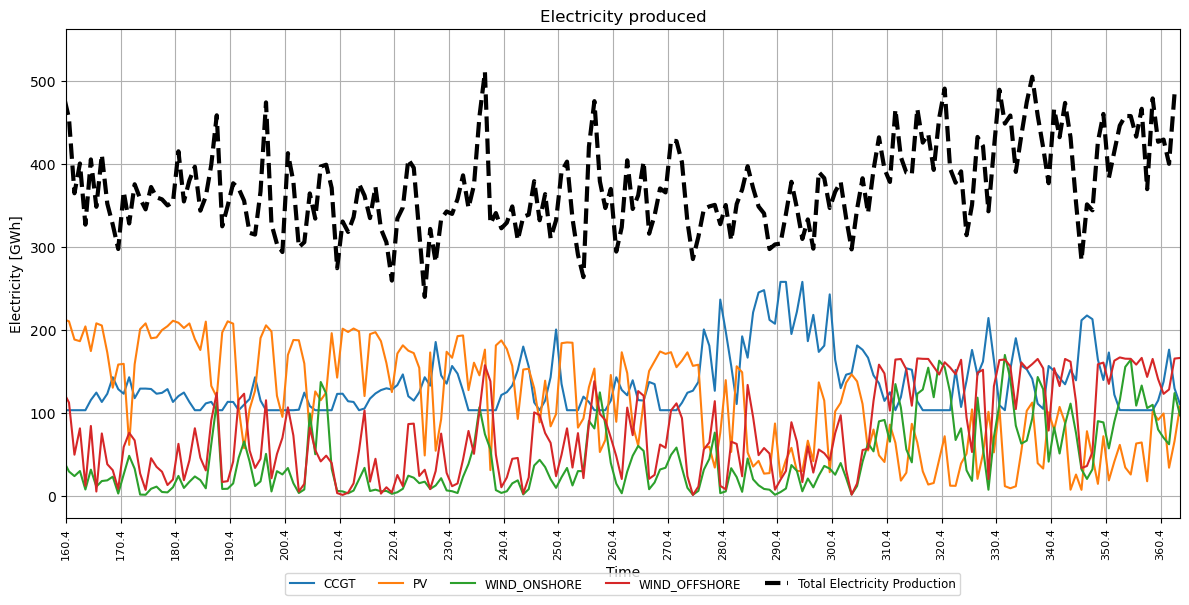

In week:
✅ Plot saved: plots\elec_prod.pdf


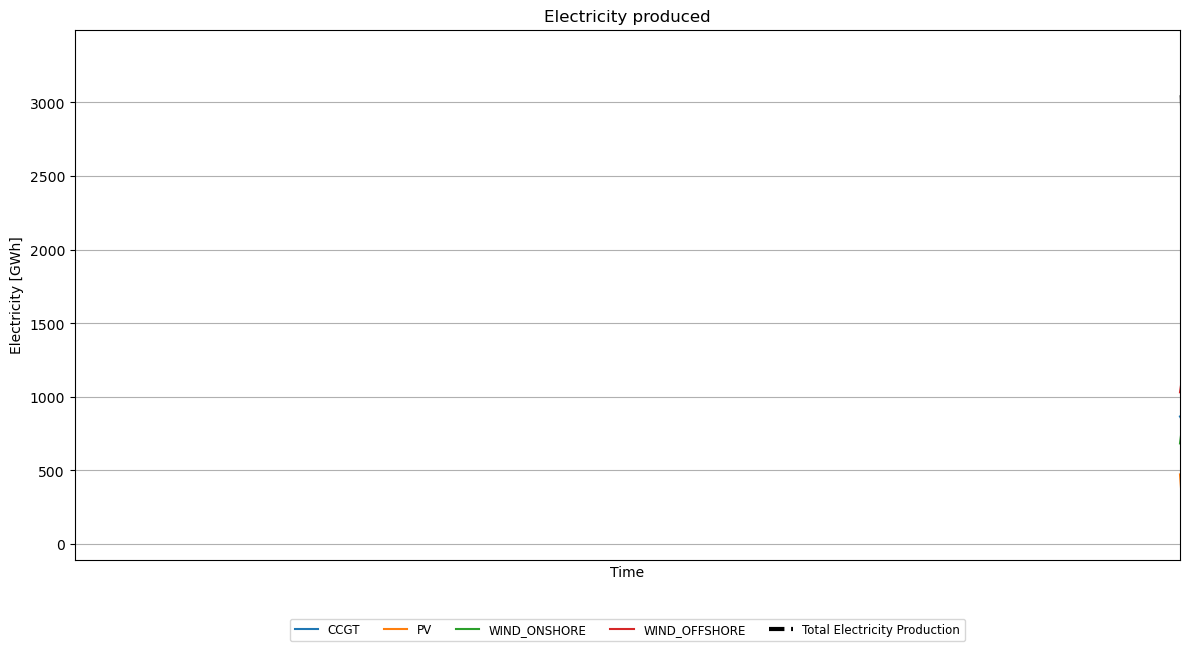

In month:
✅ Plot saved: plots\elec_prod.pdf


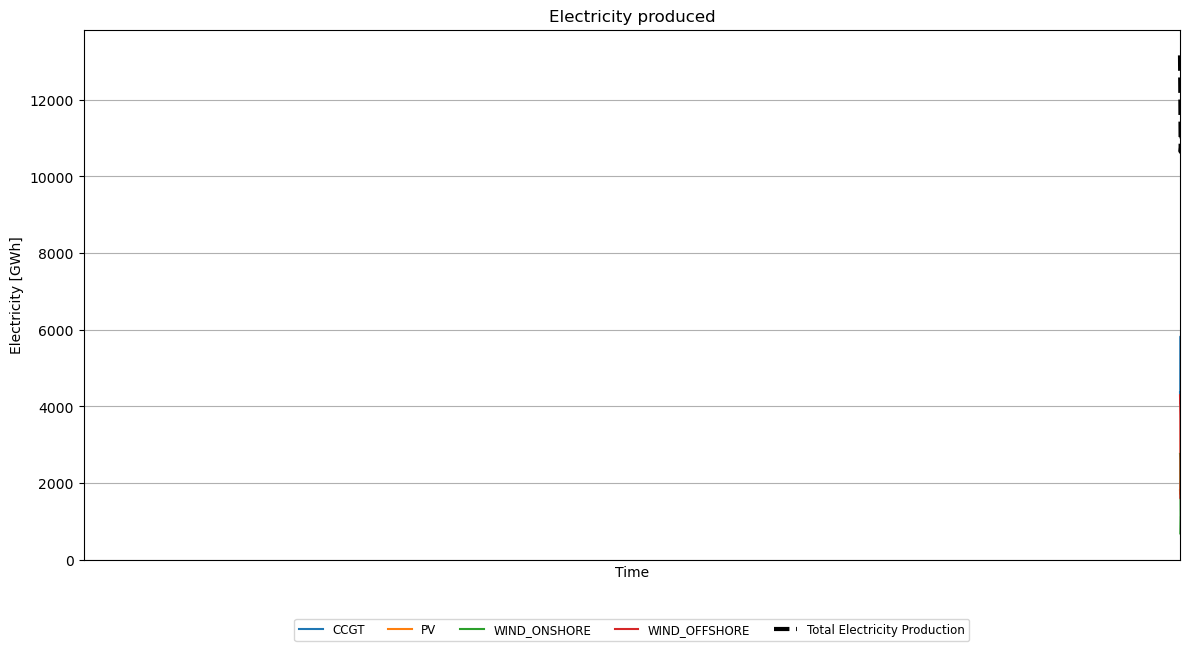

In [16]:
step = ['hour', 'day', 'week', 'month']
zooms = ['day', 'week', 'month']

print(colored('Zooming the data:', 'white','on_blue'))
for zoom in zooms:
    
    print(colored(f'In {zoom}:', 'blue'))
    data_zoomed = pf.zoom_with_timestep(node_test, zero_nodes='yes', zoom=zoom)  
    sum = pf.plot_maker_new(data = data_zoomed, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',  
                        title = 'Electricity produced', save_name = 'elec_prod', rotation = 90, print_skip='no') 

#### Precise zoom:

##### Different zoom: ['hour','day', 'week, 'month']

    - Number parameter allow to select the period where to focus for exemple number 4 with monthly zoom plots April

Zooming the data:
Zoom = day | Step = hour
✅ Plot saved: plots\elec_prod.pdf


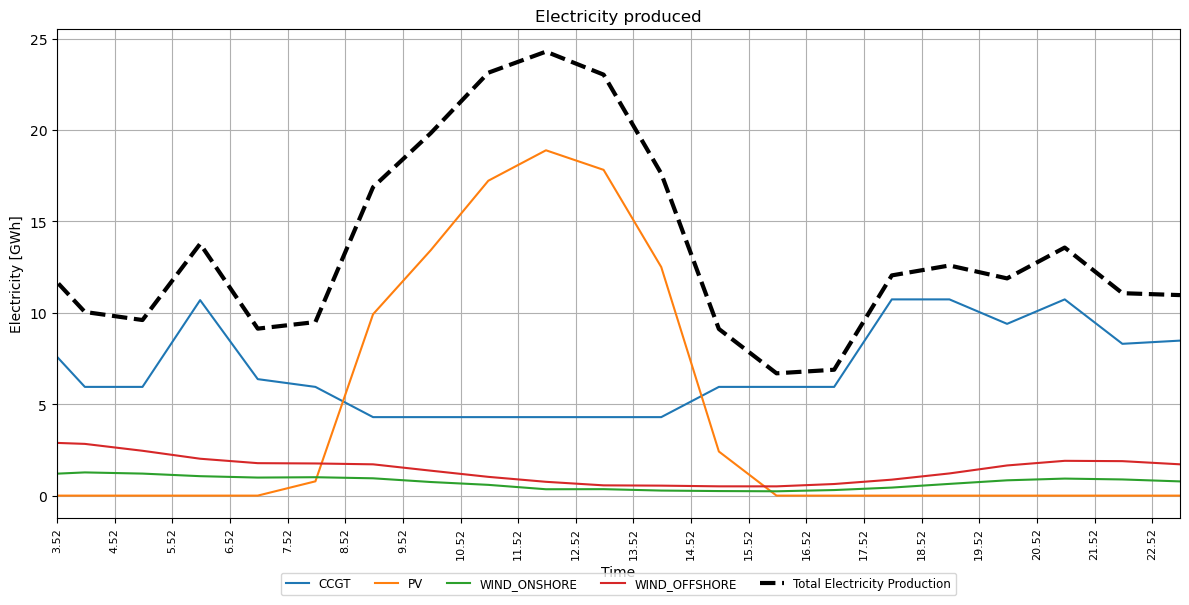

Zoom = week | Step = hour
✅ Plot saved: plots\elec_prod.pdf


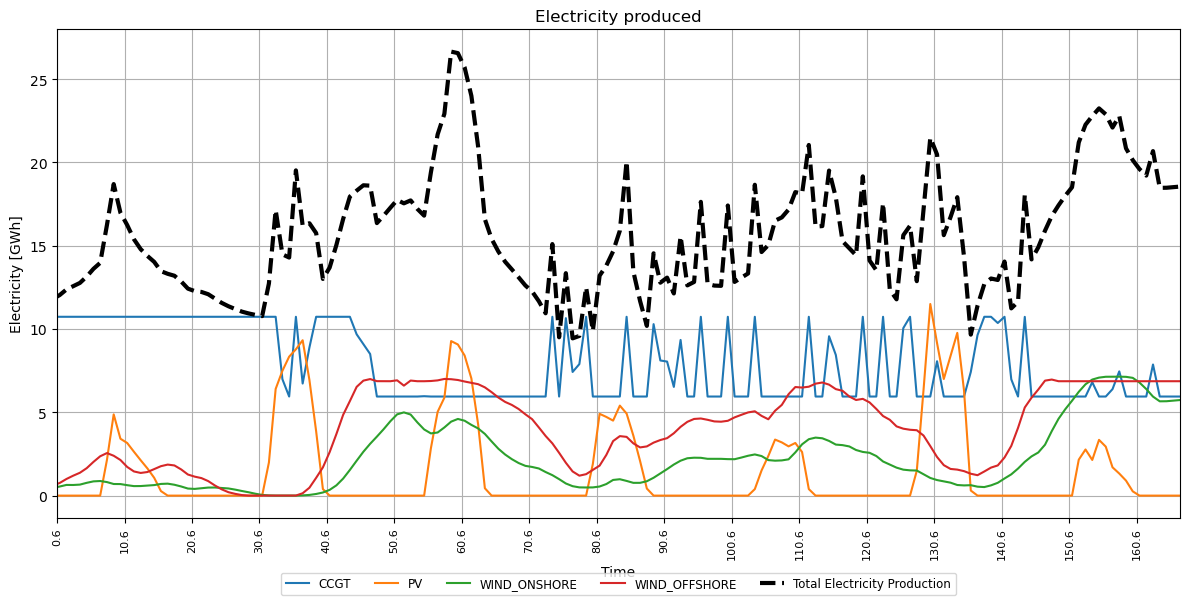

Zoom = week | Step = day
✅ Plot saved: plots\elec_prod.pdf


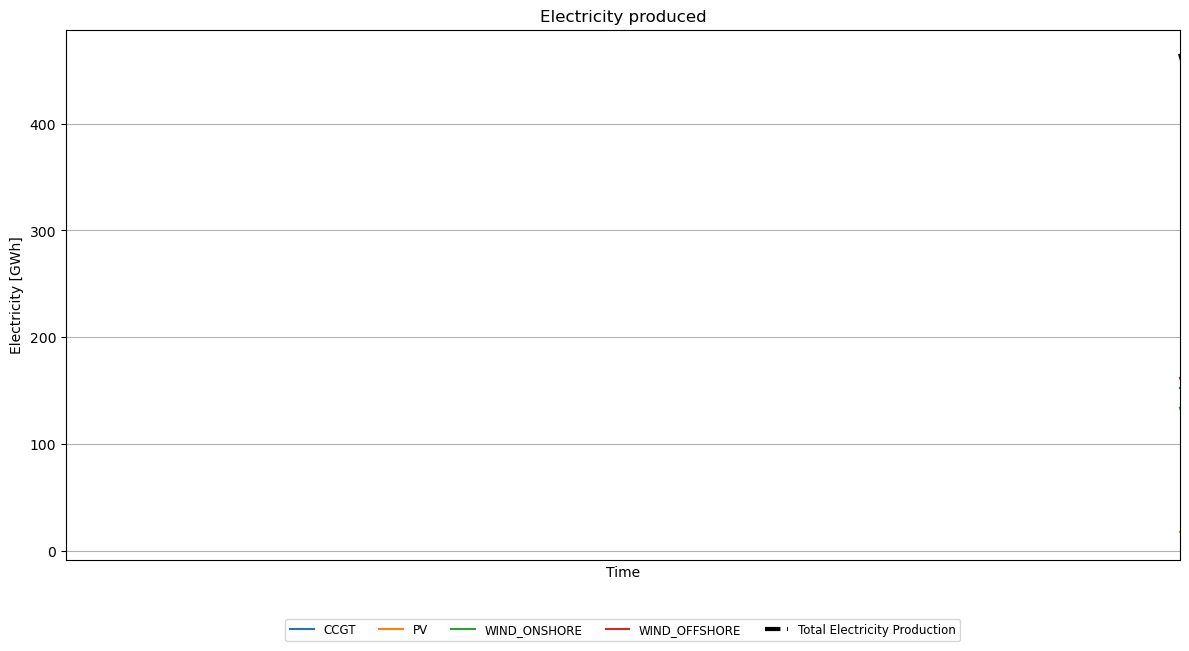

Zoom = month | Step = hour
✅ Plot saved: plots\elec_prod.pdf


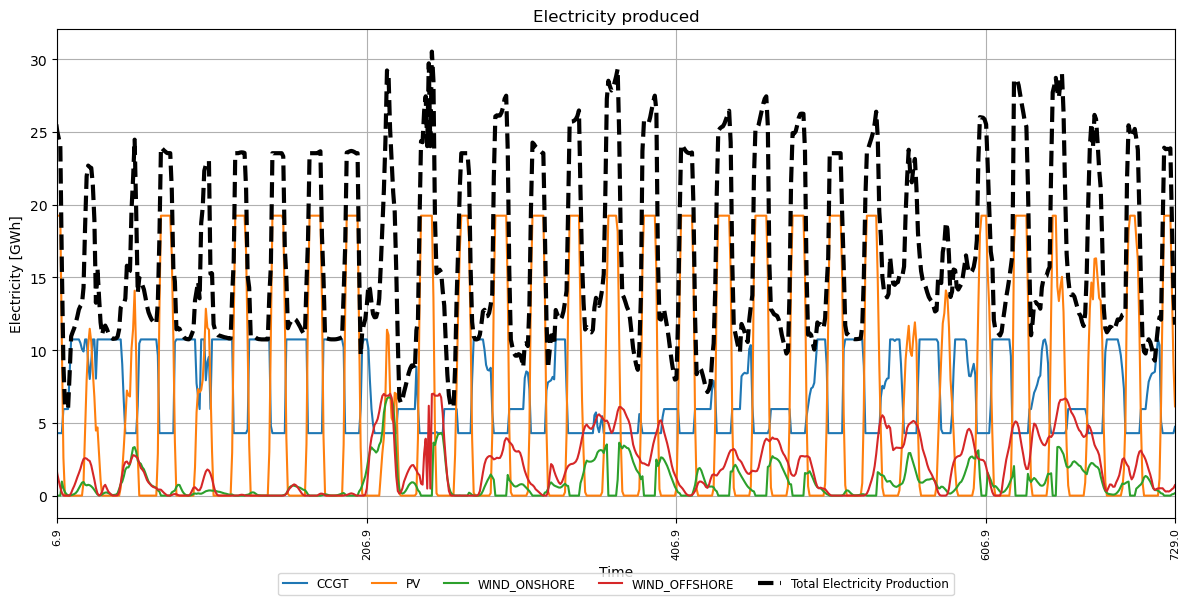

Zoom = month | Step = day
✅ Plot saved: plots\elec_prod.pdf


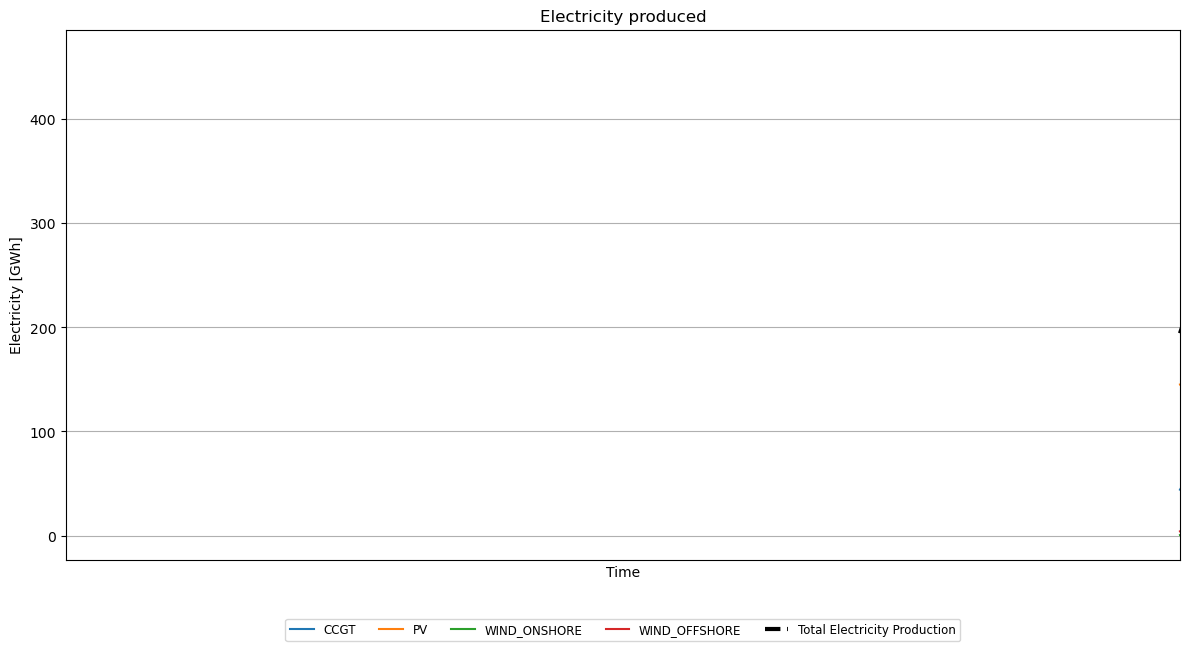

Zoom = month | Step = week
✅ Plot saved: plots\elec_prod.pdf


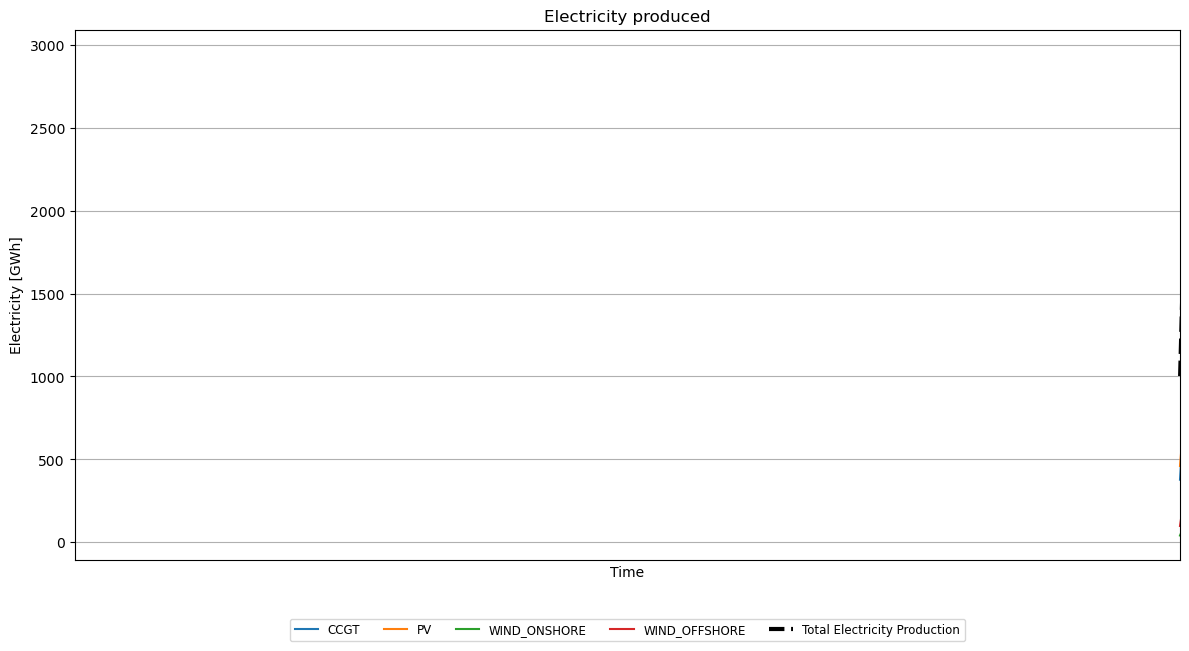

In [17]:
steps = ['hour', 'day', 'week']
zooms = ['day', 'week', 'month']
precise = 4
  
print(colored('Zooming the data:', 'white', 'on_blue'))

invalid_combinations = [ ('day', 'day'), ('day', 'week'), ('week', 'week'), ]

for zoom in zooms:
    for step in steps:

        if (zoom, step) in invalid_combinations:
            # print(colored(f'Skipped invalid combination: zoom="{zoom}" with step="{step}"', 'yellow'))
            continue

        print(colored(f'Zoom = {zoom} | Step = {step}', 'blue'))

        data_zoomed = pf.precise_zoom_with_timestep(
            data=node_test, zero_nodes='yes', zoom=zoom, number=precise, step=step)

        sum = pf.plot_maker_new(
            data=data_zoomed, type_var='Electricity Production', x_label='Time', y_label='Electricity [GWh]',
            title='Electricity produced', save_name='elec_prod', rotation=90, print_skip='no')

##### But also seasons:['winter, 'sommer, 'spring', 'fall']

dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
✅ Plot saved: c:\Users\yaita\OneDrive\Bureau\Master Thesis\Belgium Model - Younès\Plots\elec_prod.pdf


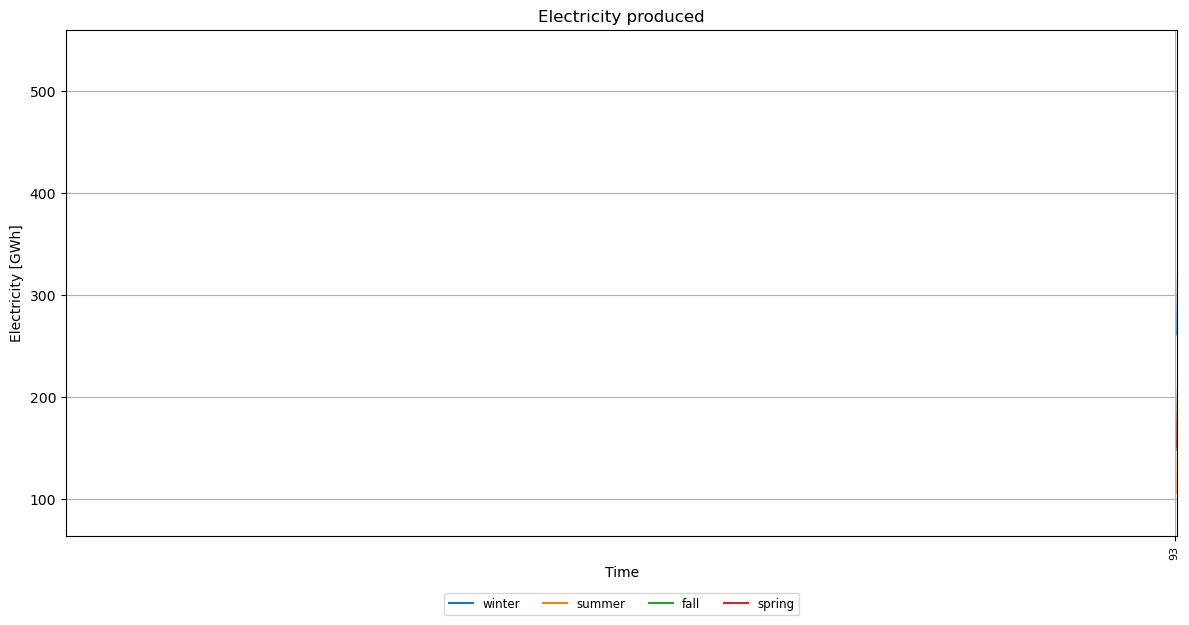

dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])
✅ Plot saved: c:\Users\yaita\OneDrive\Bureau\Master Thesis\Belgium Model - Younès\Plots\elec_prod.pdf


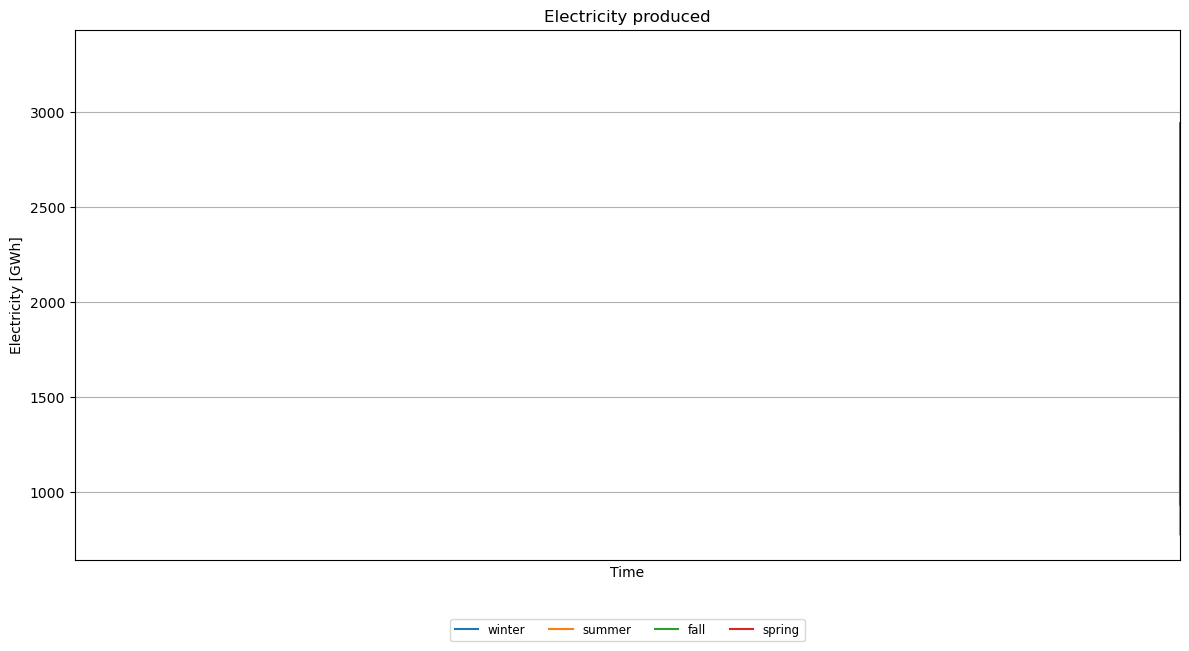

In [18]:
# steps = ['hour', 'day', 'week']
steps = ['day', 'week']
seasons = ['winter', 'summer', 'fall', 'spring']


for step in steps:
    
    data_total = {}
    data_sum = {}
    for season in seasons:

        data = pf.precise_zoom_with_timestep(data=node_test, zoom=season, number=3, step=step)  
        print(data.keys())
        data_total[season] = pf.get_total_timeseries_dict(data) 
    
    pf.plot_maker_new(data=data_total, type_var = 'Production', x_label='Time', y_label='Electricity [GWh]', total_plot='no',
                                    title='Electricity produced', save_name='elec_prod', rotation=90, plot_folder=plot_folder)
   

##### Precise zoom - change time step, starting index, ending index

- To test if it performs time sequencing

In [19]:
print(colored('Length of the data sets:', 'green'))

for n in node_test:
    print(f"{n}: {len(node_test[n])}")
  
print('')
print(colored('Length of the new formated data sets:', 'green'))
   
new_data, abcisse = pf.get_new_format(data=node_test, start_index=0, end_index=8760, step=200, xticks='yes')

for n in new_data:
    print(f'{n}: {len(new_data[n])}')
                                      

Length of the data sets:
BIOMASS: 8760
CCGT: 8760
CHP: 8760
FUEL_CELLS: 8760
NUCLEAR: 8760
OCGT: 8760
PV: 8760
WASTE: 8760
WIND_ONSHORE: 8760
WIND_OFFSHORE: 8760

Length of the new formated data sets:
BIOMASS: 45
CCGT: 45
CHP: 45
FUEL_CELLS: 45
NUCLEAR: 45
OCGT: 45
PV: 45
WASTE: 45
WIND_ONSHORE: 45
WIND_OFFSHORE: 45


Nothing changed:
✅ Plot saved: plots\elec_prod.pdf


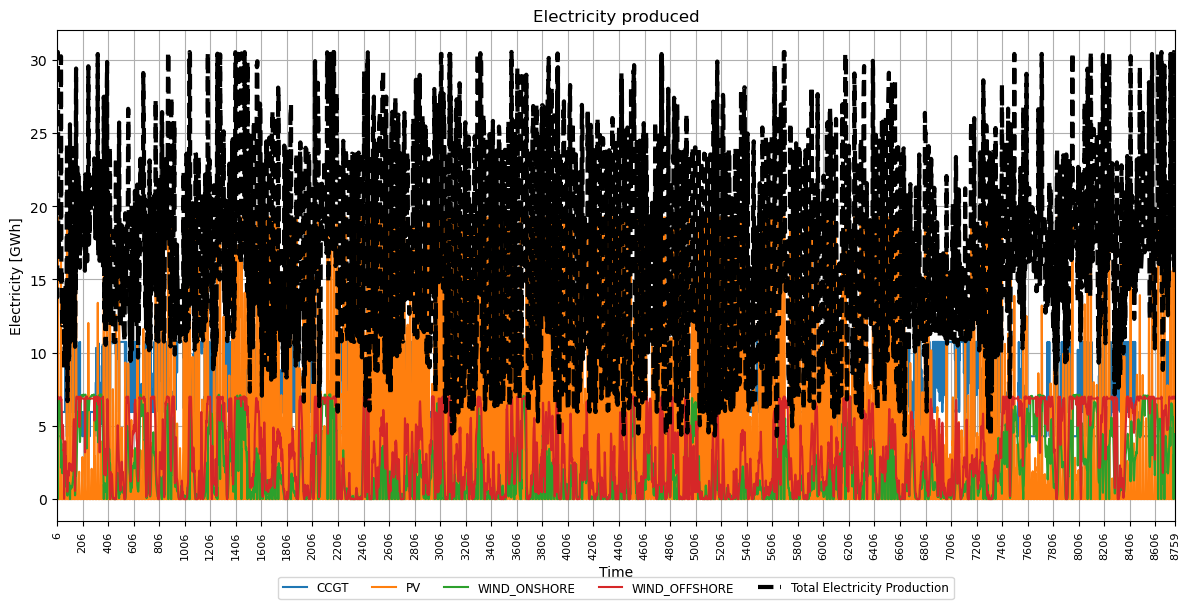

Step changed by 100 instead of 1:
Total is plot:
✅ Plot saved: plots\elec_prod.pdf


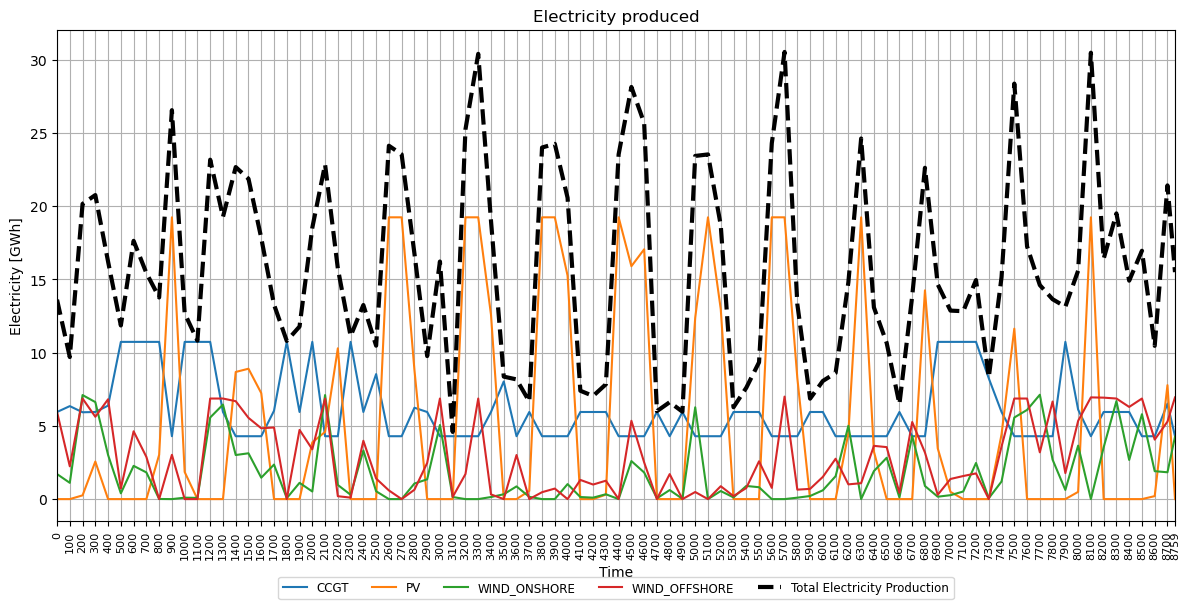

Total not plot:
✅ Plot saved: plots\elec_prod.pdf


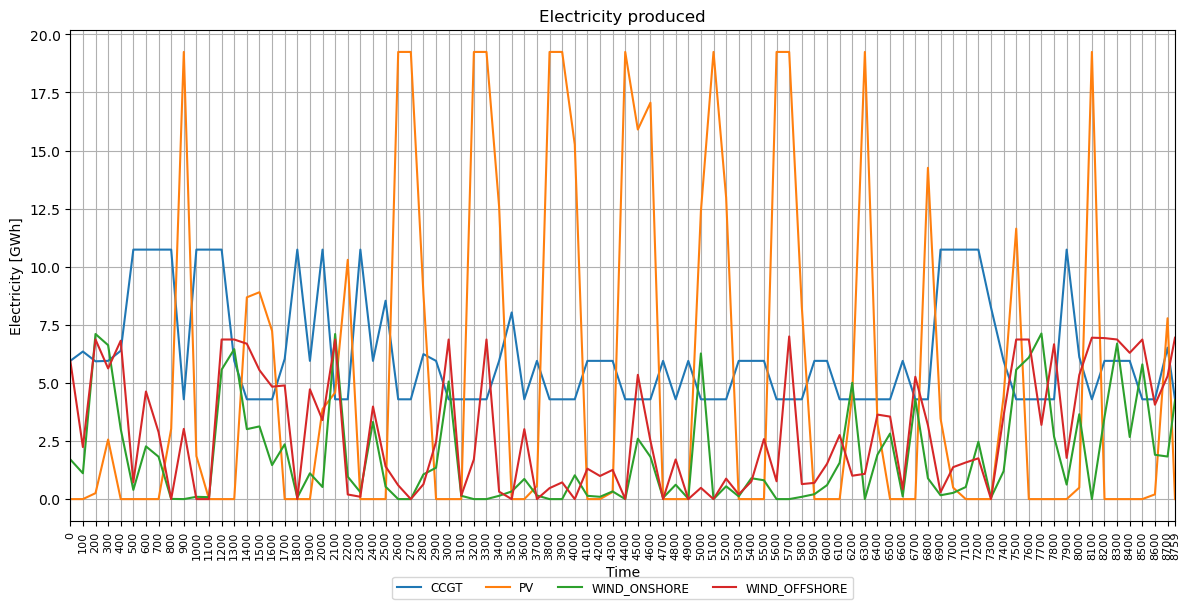

In [20]:
print(colored(f'Nothing changed:', 'white', 'on_blue'))
sum = pf.plot_maker_new(data = node_test, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',
                              title = 'Electricity produced', save_name = 'elec_prod',rotation = 90, print_skip='no')


print(colored(f'Step changed by 100 instead of 1:', 'white', 'on_blue'))
print(colored('Total is plot:', 'blue'))
new_data, xticks = pf.get_new_format(data=node_test, start_index=0, end_index=8760, step=100, xticks='yes')
sum = pf.plot_maker_new(data = new_data, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',
                     xticks= xticks, title = 'Electricity produced', save_name = 'elec_prod',rotation = 90, print_skip='no')


new_data, xticks = pf.get_new_format(data=node_test, start_index=0, end_index=8760, step=100, xticks='yes')
print(colored('Total not plot:', 'blue'))
sum = pf.plot_maker_new(data = new_data, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',
                     xticks= xticks, title = 'Electricity produced', save_name = 'elec_prod',rotation = 90, total_plot='no', print_skip='no')
 

Step changed by 100 instead of 1:
Total is plot:
✅ Plot saved: plots\elec_prod.pdf


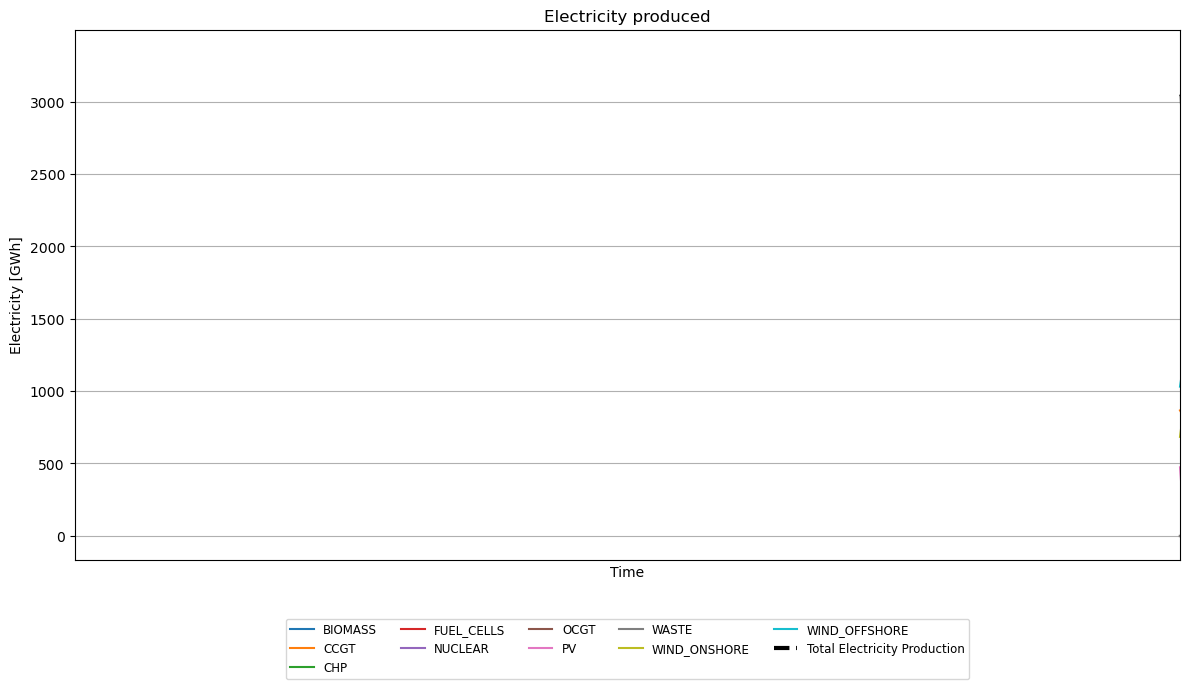

⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


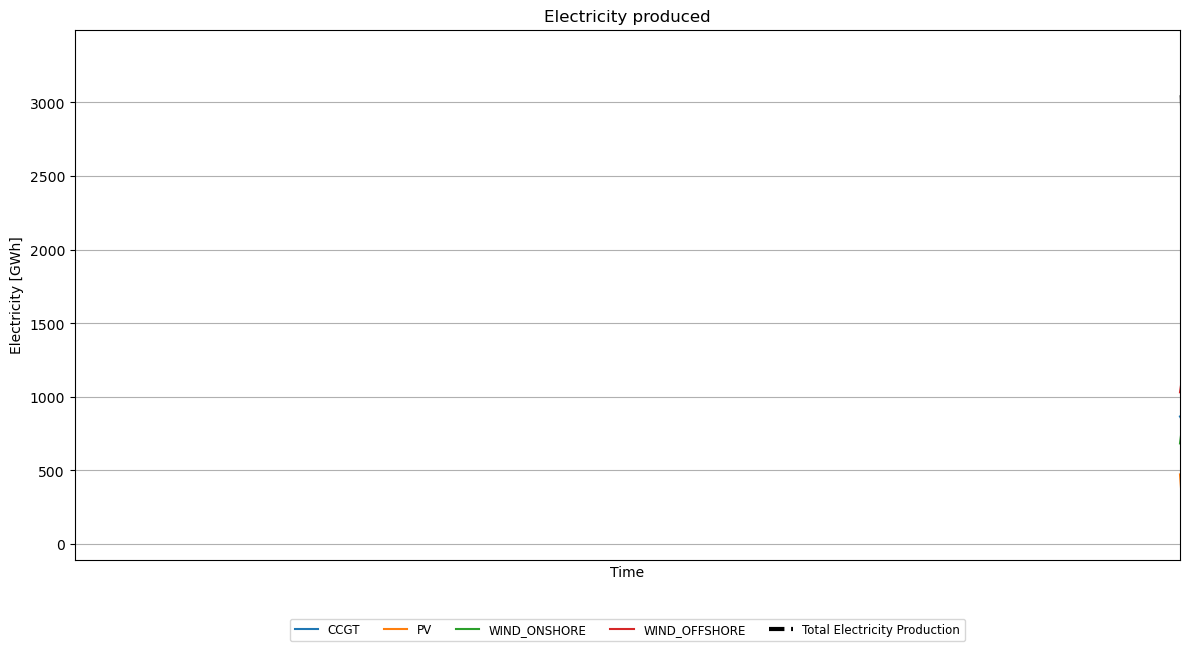

⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


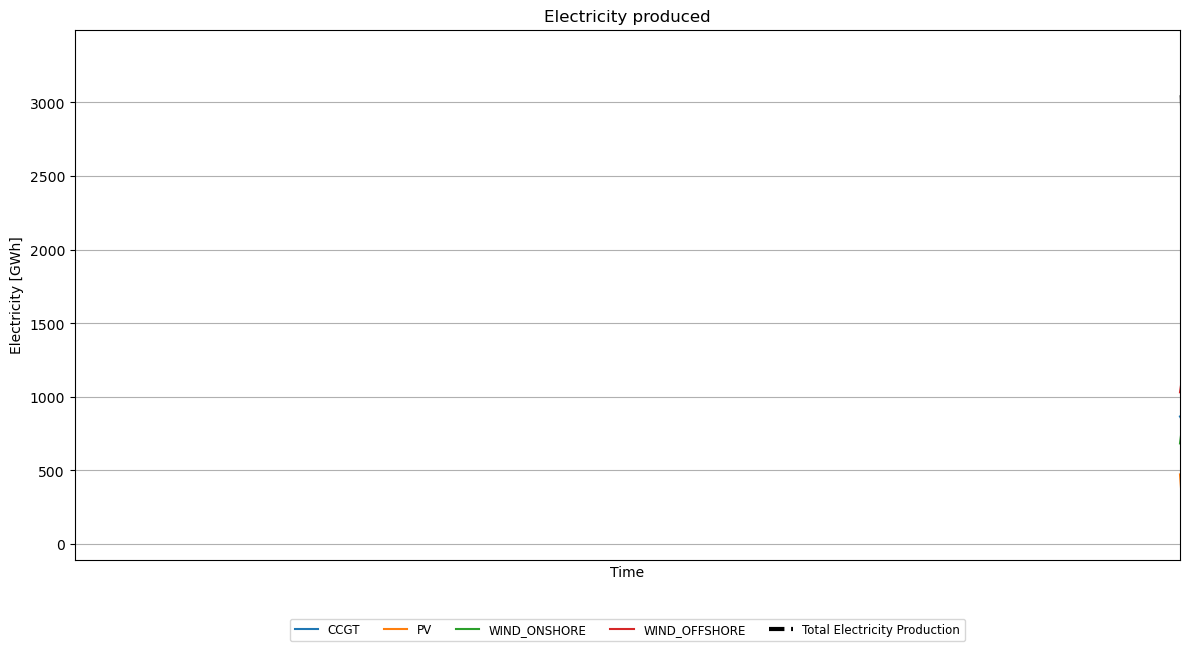

In [21]:

print(colored(f'Step changed by 100 instead of 1:', 'white', 'on_blue'))
print(colored('Total is plot:', 'blue'))

zoom = pf.zoom_with_timestep(node_test, zero_nodes='yes', zoom='week')

sum = pf.plot_maker_new(data = zoom, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',  
                      title = 'Electricity produced', save_name = 'elec_prod', rotation = 90, zero_nodes='yes')  

sum = pf.plot_maker_new(data = zoom, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',  
                      title = 'Electricity produced', save_name = 'elec_prod', rotation = 90)  

sum = pf.plot_maker_new(data = zoom, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]', offset='yes',
                       title = 'Electricity produced', save_name = 'elec_prod', rotation = 90)  



Zooming in hour:
✅ Plot saved: plots\elec_prod.pdf


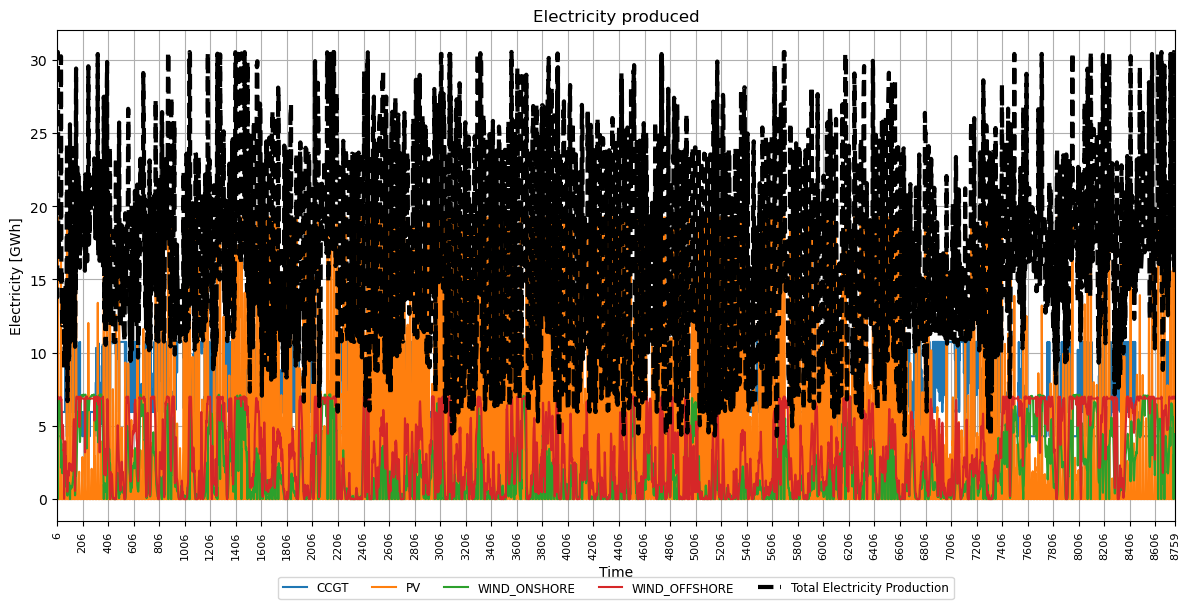

Zooming in day:
✅ Plot saved: plots\elec_prod.pdf


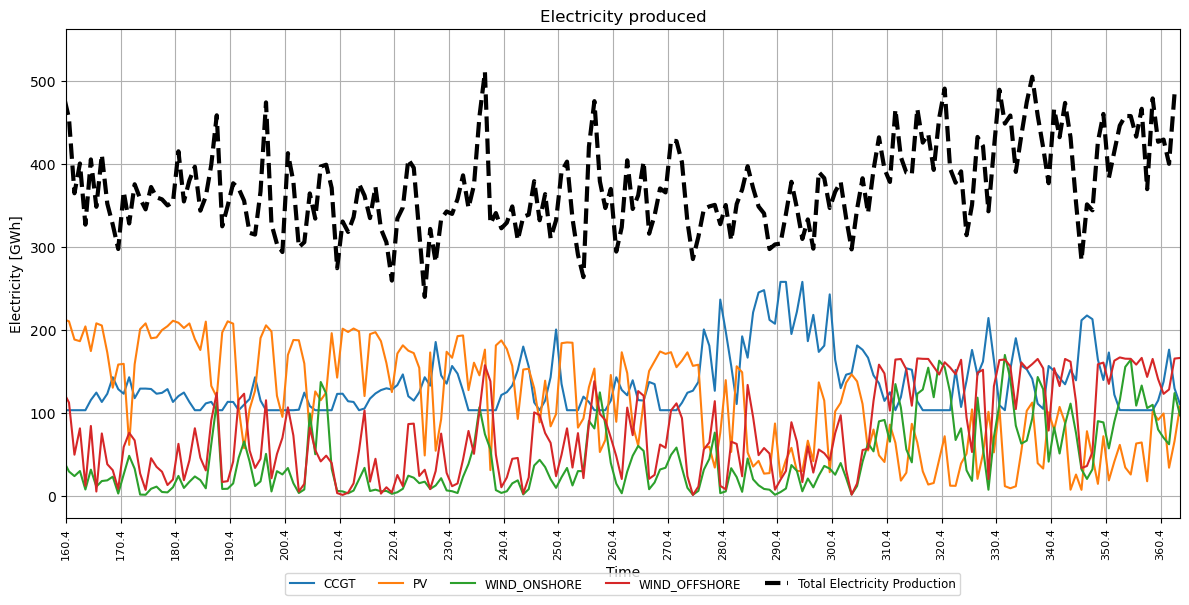

Zooming in week:
✅ Plot saved: plots\elec_prod.pdf


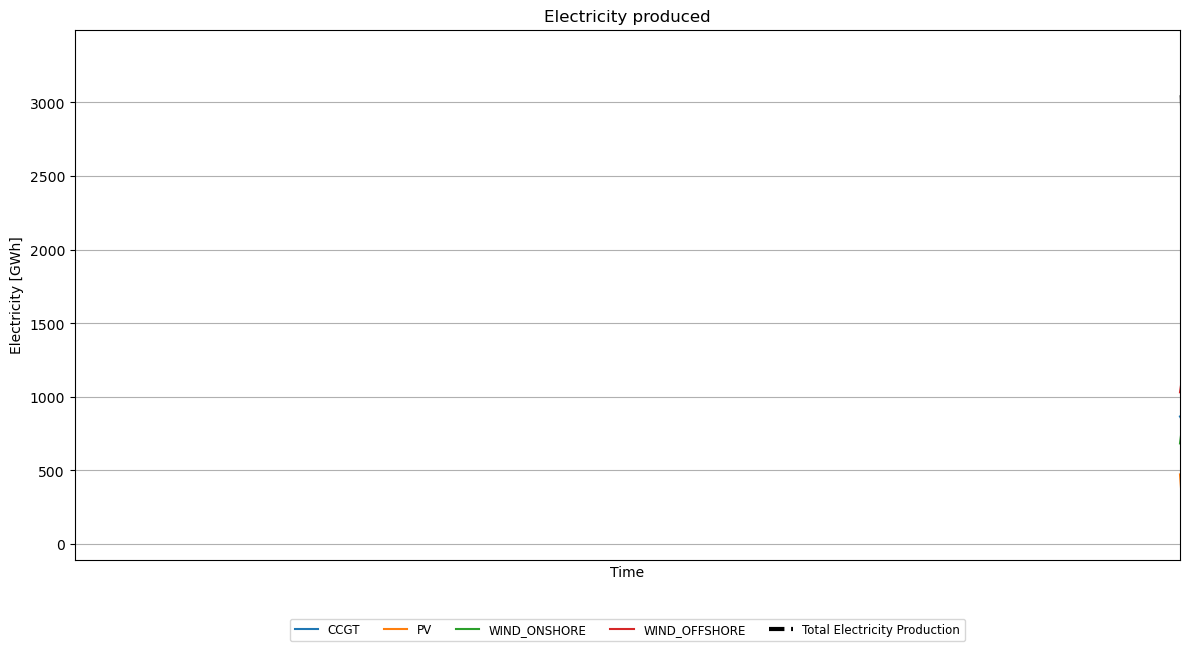

Zooming in month:
✅ Plot saved: plots\elec_prod.pdf


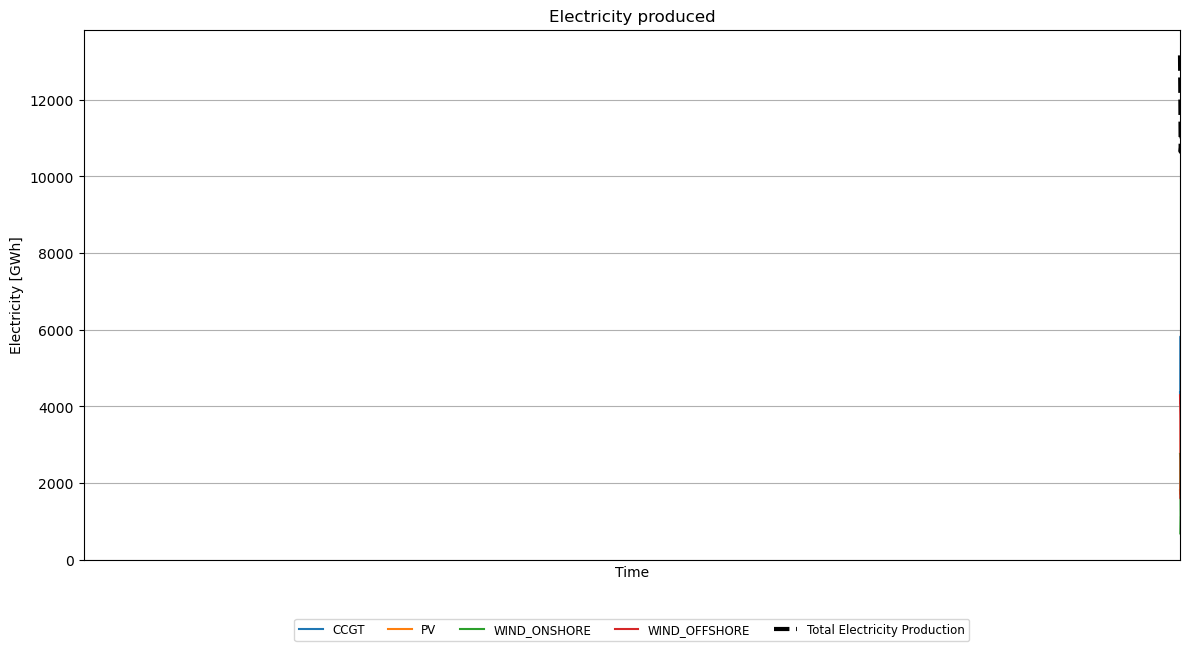

Zooming in winter:
Step is in hour:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


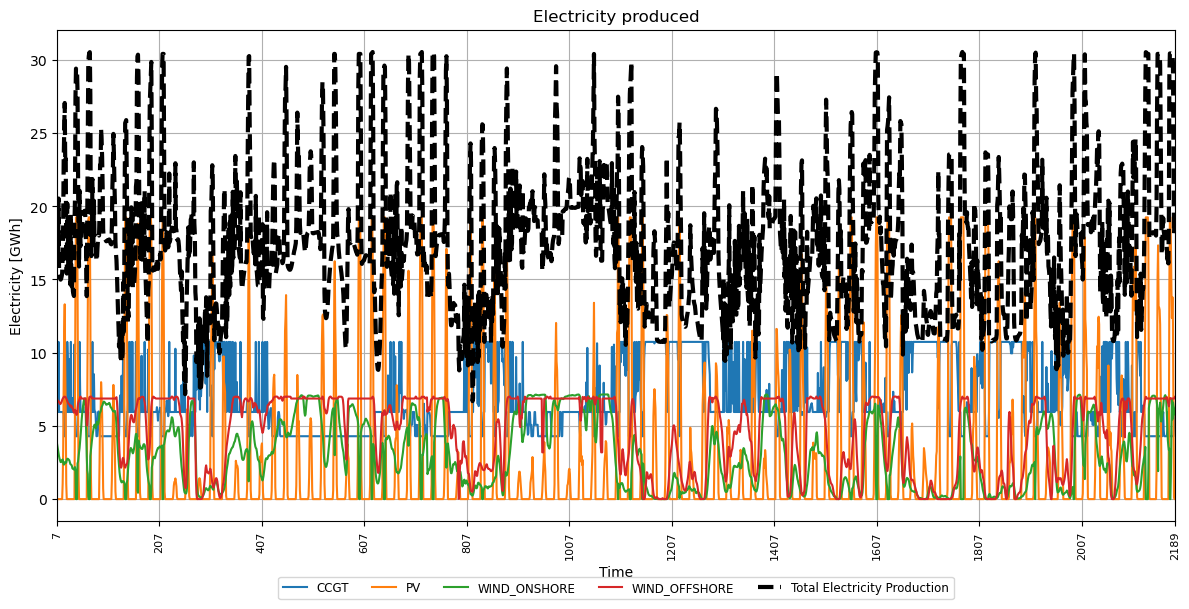

Step is in day:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


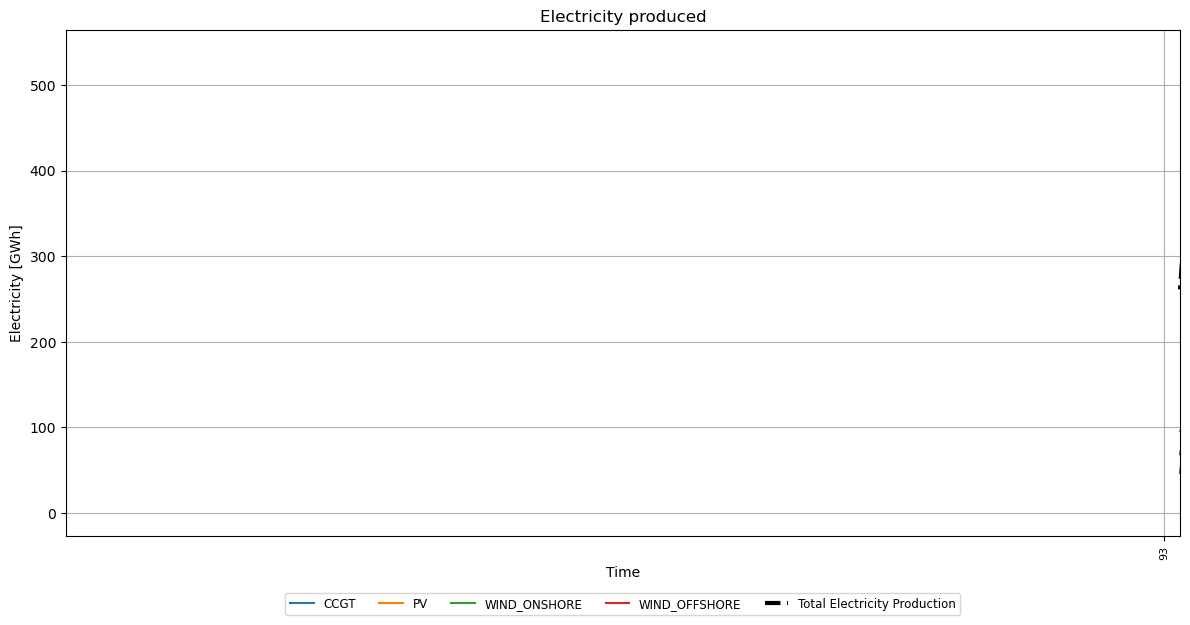

Step is in week:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


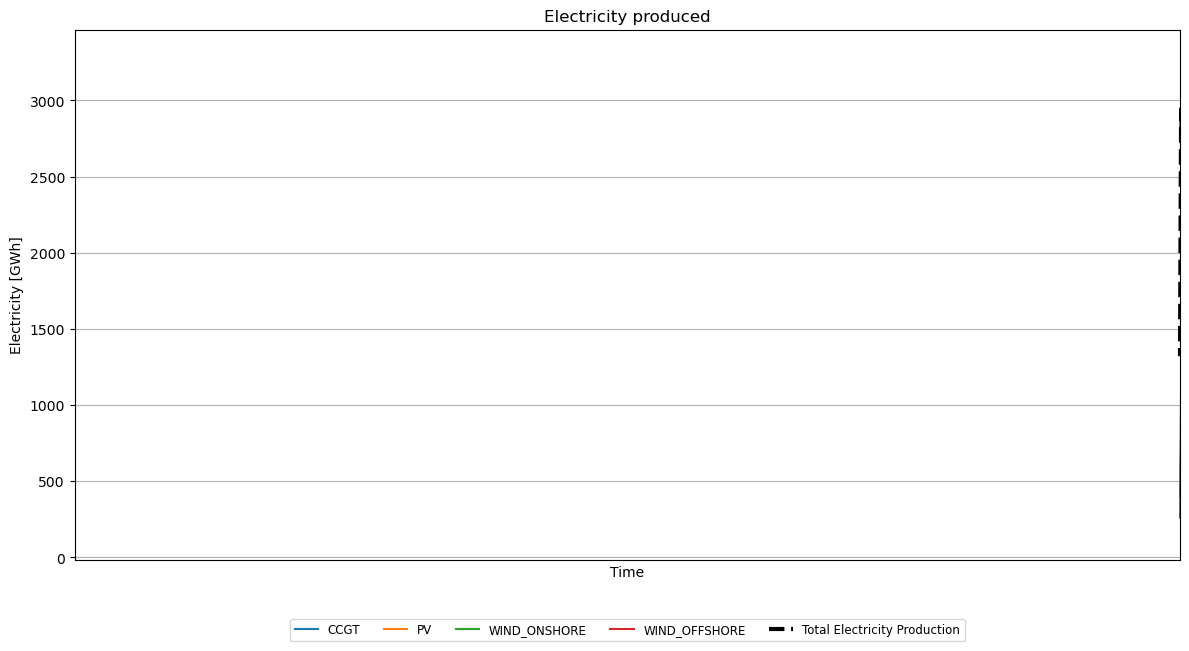

Zooming in summer:
Step is in hour:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


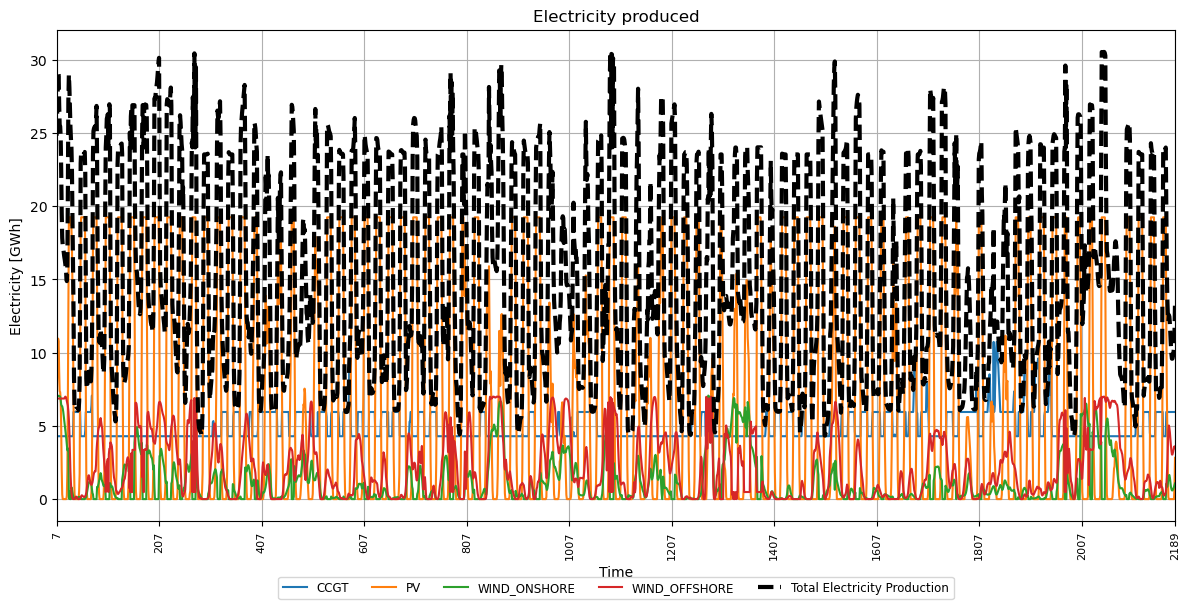

Step is in day:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


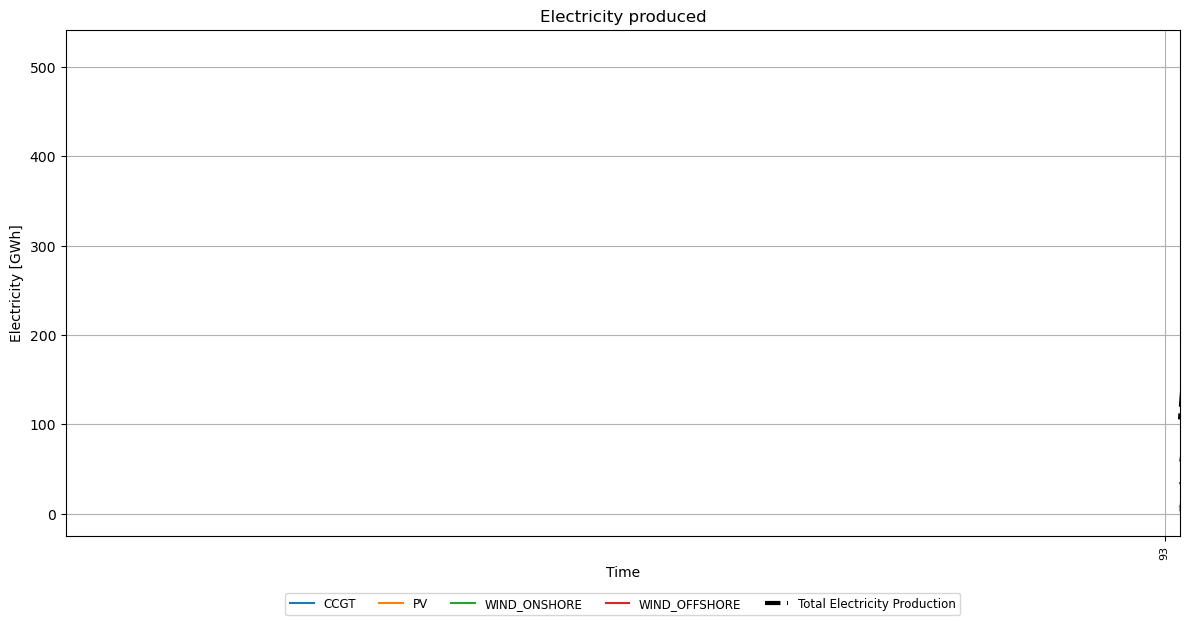

Step is in week:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


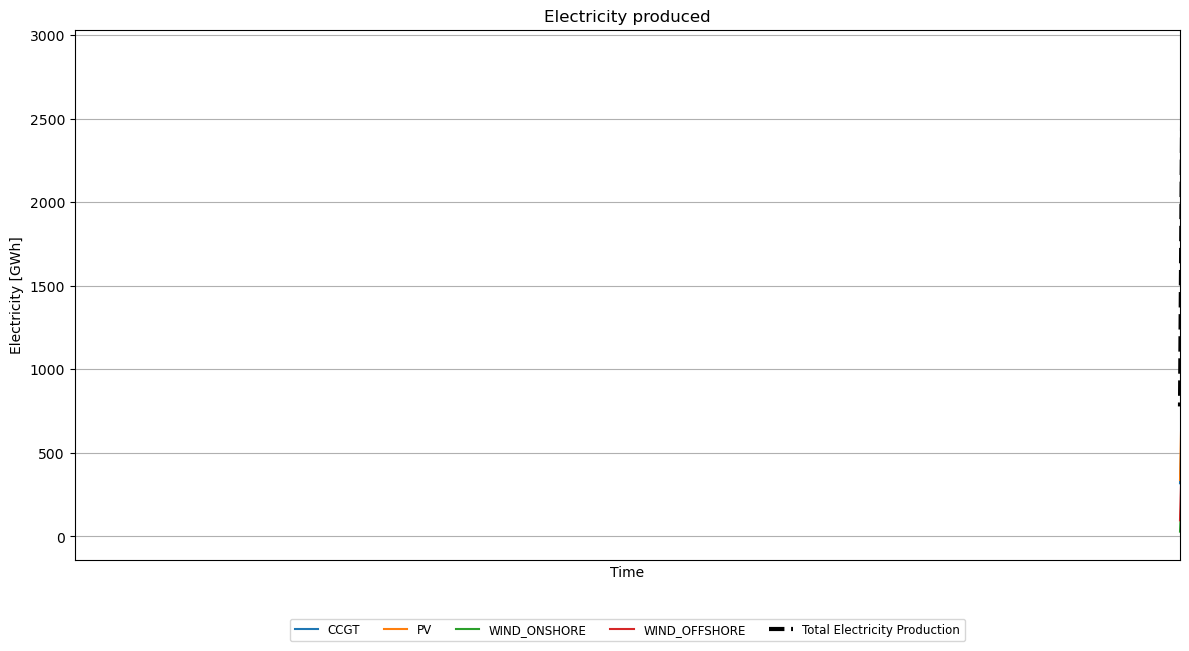

Zooming in fall:
Step is in hour:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


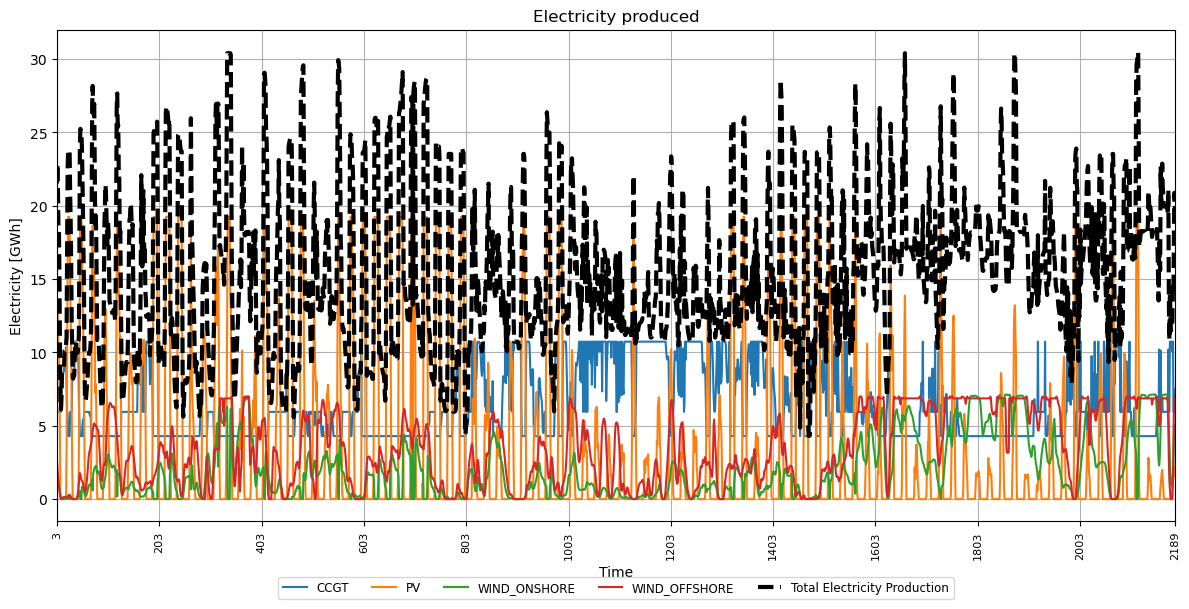

Step is in day:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


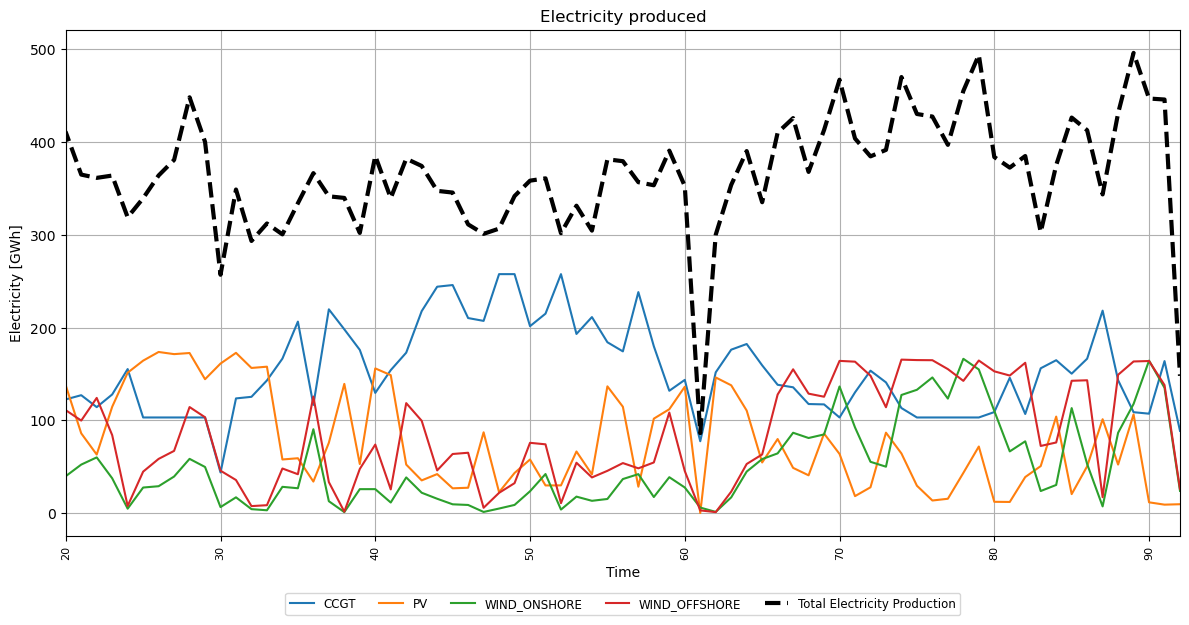

Step is in week:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


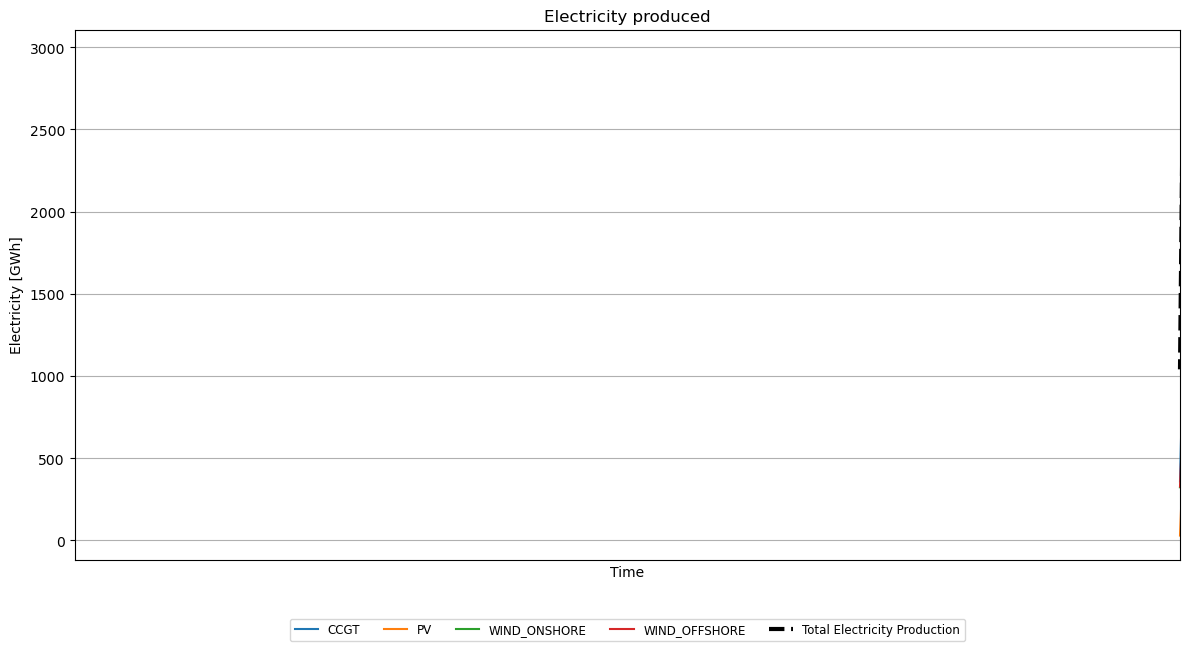

Zooming in spring:
Step is in hour:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


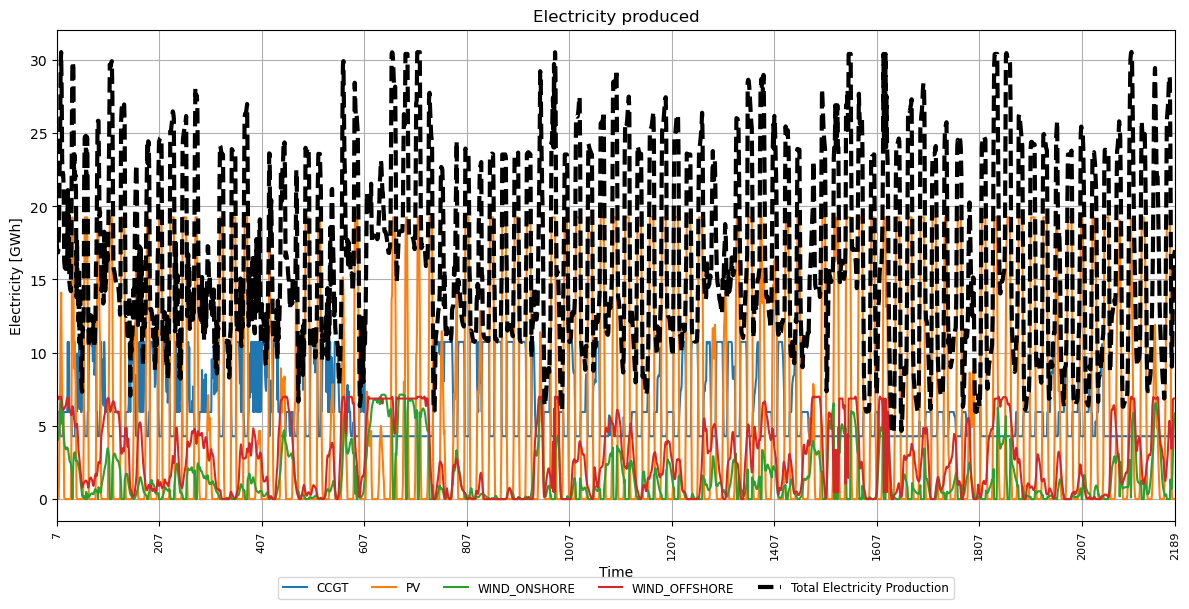

Step is in day:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


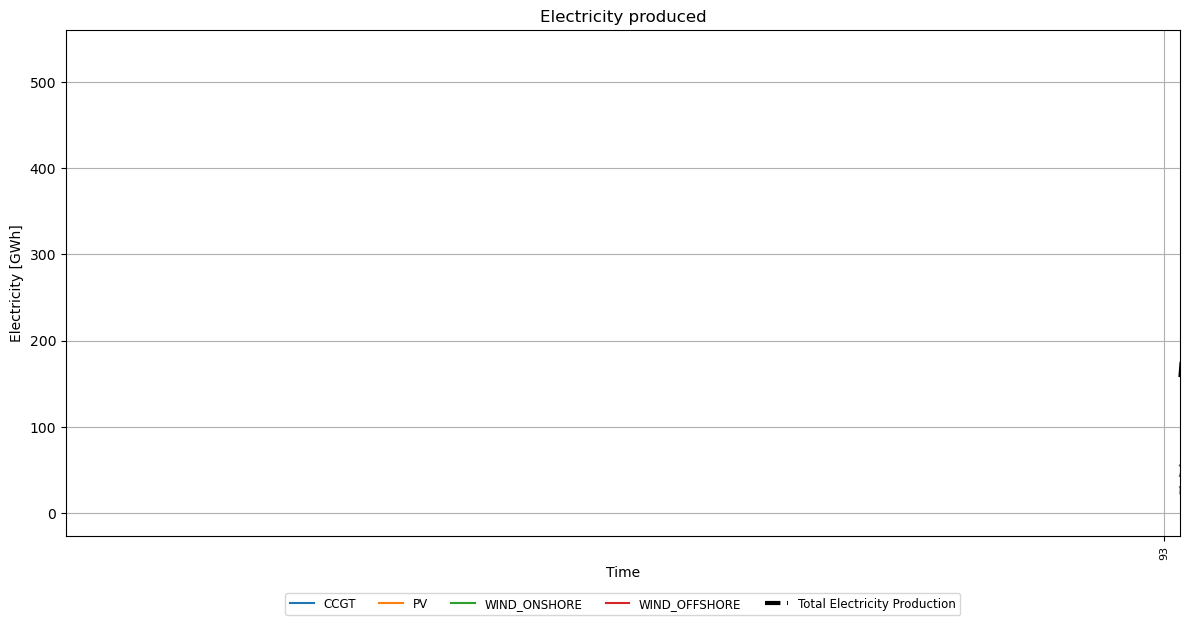

Step is in week:
⚠️ Skipping series because it contains only zeros: BIOMASS
⚠️ Skipping series because it contains only zeros: CHP
⚠️ Skipping series because it contains only zeros: FUEL_CELLS
⚠️ Skipping series because it contains only zeros: NUCLEAR
⚠️ Skipping series because it contains only zeros: OCGT
⚠️ Skipping series because it contains only zeros: WASTE
✅ Plot saved: plots\elec_prod.pdf


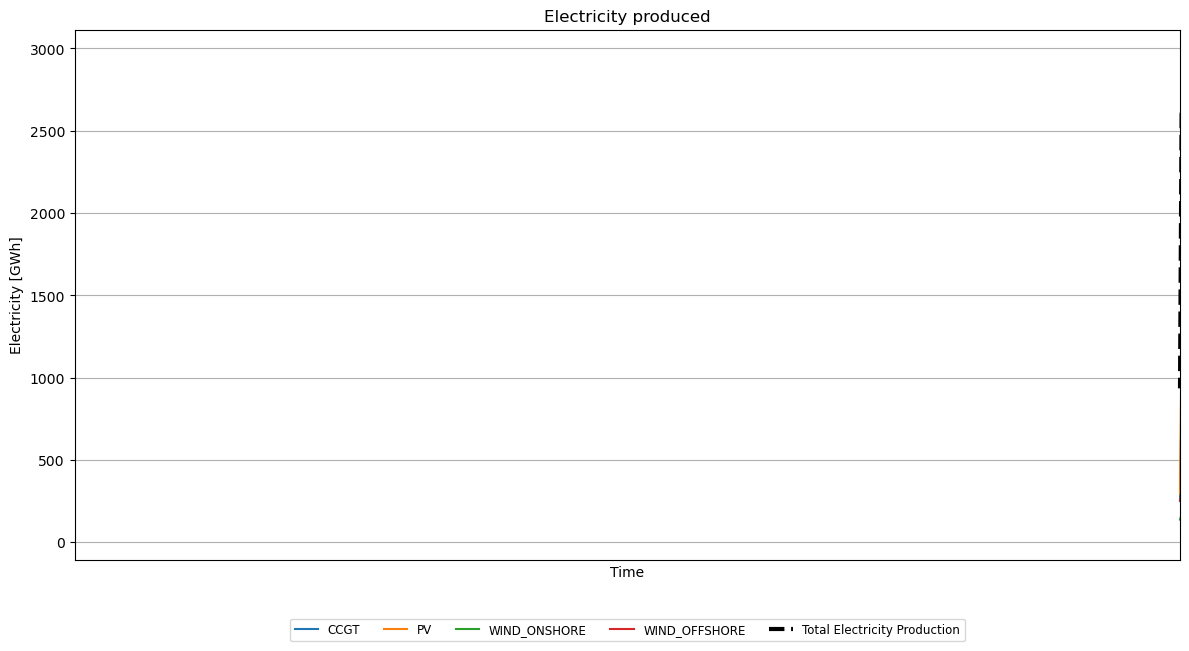

In [22]:
zoom = ['hour', 'day', 'week', 'month']
precise_zoom = ['winter', 'summer', 'fall', 'spring']
steps = ['hour','day', 'week']

for zoom in zoom:
    print(colored(f'Zooming in {zoom}:', 'white', 'on_magenta'))    
    zoom = pf.zoom_with_timestep(node_test, zero_nodes='no', zoom=zoom)
    
    sum = pf.plot_maker_new(data = zoom, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',  
                        title = 'Electricity produced', save_name = 'elec_prod', rotation = 90)  
 
 
for zoom in precise_zoom:
    print(colored(f'Zooming in {zoom}:', 'white', 'on_green'))    
    
    for step in steps:
        print(colored(f'Step is in {step}:', 'green'))   

        # Application du zoom
        zoom_dict = pf.precise_zoom_with_timestep(data=node_test, zoom=zoom, number=3, step=step )
        
        # Renommage pour éviter d'écraser la fonction 'sum'
        plot_result = pf.plot_maker_new(data=zoom_dict, type_var='Electricity Production', x_label='Time',
                                        y_label='Electricity [GWh]', title='Electricity produced', save_name='elec_prod', rotation=90  )

# BOX plot


- Can change box plot color with box_color
- Can change mean bar color with argument: mean_color
- Can change width with argument: widths
- Can annotate with to_annotate and can choose what to annotate with what_to_annotate

In [23]:
Bel_cluster_dict["solution"]["elements"]['INLAND']['sub_elements']['PV']["objectives"]

{'named': {'fix_cost': 3267.220775230301, 'var_cost': 0.0}}

#### From variable: 

In [24]:
print(node_test.keys())

dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])


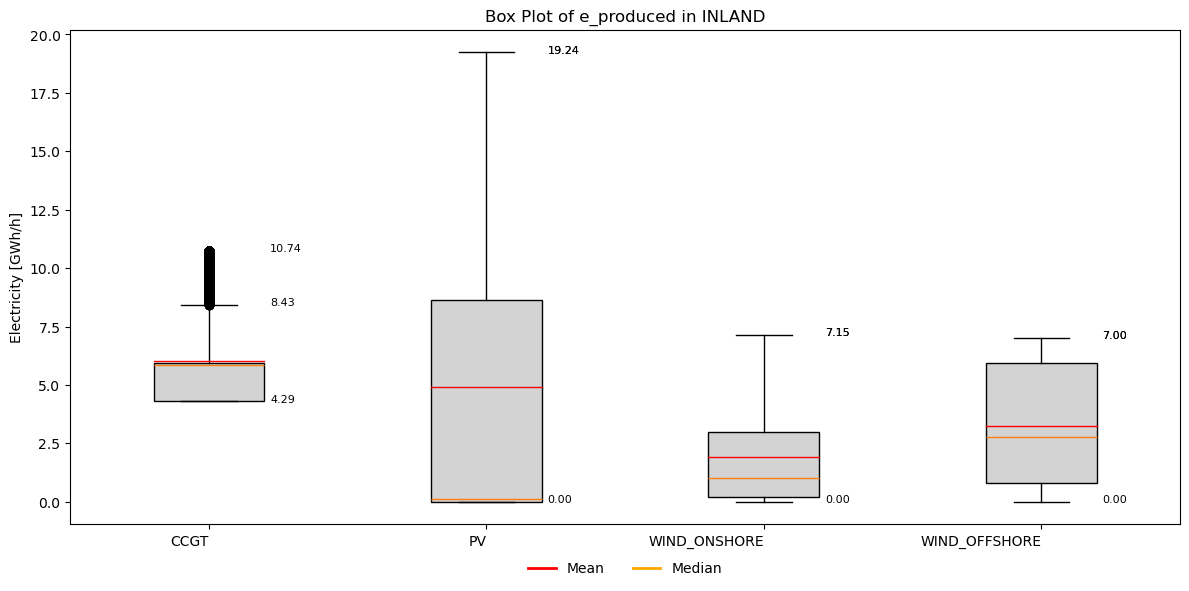

Node  Mean  Median   Min    Max    Q1    Q3  Min Outlier  \
0           CCGT  6.02    5.87  4.29   8.43  4.29  5.95         4.29   
1             PV  4.92    0.12  0.00  19.24  0.00  8.64         0.00   
2   WIND_ONSHORE  1.90    1.01  0.00   7.15  0.19  2.98         0.00   
3  WIND_OFFSHORE  3.22    2.75  0.00   7.00  0.80  5.92         0.00   

   Max Outlier  
0        10.74  
1        19.24  
2         7.15  
3         7.00

Node  Mean  Median   Min    Max    Q1    Q3  Min Outlier  \
0           CCGT  6.02    5.87  4.29   8.43  4.29  5.95         4.29   
1             PV  4.92    0.12  0.00  19.24  0.00  8.64         0.00   
2   WIND_ONSHORE  1.90    1.01  0.00   7.15  0.19  2.98         0.00   
3  WIND_OFFSHORE  3.22    2.75  0.00   7.00  0.80  5.92         0.00   

   Max Outlier  
0        10.74  
1        19.24  
2         7.15  
3         7.00

In [25]:
stat = pf.box_plot(
    data=node_test,
    title='Box Plot of e_produced in INLAND', 
    y_label='Electricity [GWh/h]', 
    hue=None,
    box_color='lightgray',  # Changed to light gray
    mean_color='red',
    median_color='orange',
    widths=0.4,   
    to_plot='yes',
    to_annotate='yes',
    what_to_annotate=['min', 'max', 'max_outlier']
)

display(stat)

# Power and Energy/Quantity barplot

#### To have the power and energy dictionnary 

In [26]:
clu = pf.get_all_cluster_names(Bel_cluster_dict)
print(clu)
dico = {}

for c in clu:
    try:
        # Ensure the key exists before accessing it
        sub_nodes = pf.get_all_cluster_subnodes_names(c, Bel_cluster_dict)
        dico[c] = sub_nodes
        print(c, dico[c])
    except KeyError as e:
        print(f"KeyError: {e} for cluster {c}. Please check the structure of the dictionary.")

['DENMARK', 'DEUTSCHLAND', 'FRANCE', 'HV_OFF_ZB', 'HV_ZB_INL', 'INLAND', 'LUXEMBOURG', 'NETHERLANDS', 'OFFSHORE', 'PIPE_H2_OFF_ZB', 'PIPE_H2_ZB_INL', 'PIPE_NG_ZB_INL', 'UNITED_KINGDOM', 'ZEEBRUGGE']
DENMARK ['PRODUCTION', 'PV', 'WIND_OFFSHORE', 'WIND_ONSHORE']
DEUTSCHLAND ['PRODUCTION', 'PV', 'WIND_OFFSHORE', 'WIND_ONSHORE']
FRANCE ['NUCLEAR', 'PRODUCTION', 'PV', 'WIND_OFFSHORE', 'WIND_ONSHORE']
KeyError: 'sub_nodes' for cluster HV_OFF_ZB. Please check the structure of the dictionary.
KeyError: 'sub_nodes' for cluster HV_ZB_INL. Please check the structure of the dictionary.
INLAND ['BALANCE', 'BATTERIES', 'BIOETH_PLANTS', 'BIOMASS', 'BIOMETHANE', 'CCGT', 'CELLETH_PLANTS', 'CHP', 'CO2_EXPORT', 'CO2_STORAGE', 'DAC', 'DME_PLANTS', 'DME_storage', 'ELECTROLYSIS_PLANTS', 'ETH_PLANTS', 'ETH_storage', 'FT_PLANTS', 'FUEL_CELLS', 'H2_INTERCONNECTION', 'H2_INTERCONNECTION_DE', 'H2_INTERCONNECTION_NL', 'H2_STORAGE', 'LINEPACK_NG', 'LOAD_SHEDDING_1', 'LOAD_SHEDDING_2', 'LOAD_SHEDDING_4', 'LOAD_SHED

In [27]:
elec_prod_inland = pf.get_timeseries_dict(Bel_cluster_dict, variable='e_produced', cluster='INLAND')
elec_prod_inland_cap = pf.get_cluster_subnodes_capacities_from_nodes(nodes=elec_prod_inland, cluster='INLAND', dictionary=Bel_cluster_dict)
    
# display(elec_prod_inland)

elec_prod_offshore = pf.get_timeseries_dict(Bel_cluster_dict, variable='e_produced', cluster='OFFSHORE')   
elec_prod_offshore_cap = pf.get_cluster_subnodes_capacities_from_nodes(nodes=elec_prod_offshore, cluster='OFFSHORE', dictionary=Bel_cluster_dict)
        
# display(elec_prod_offshore)

node_test = pf.merge_dictionaries(elec_prod_inland, elec_prod_offshore)
# display(node_test.keys()) 

elec_prod_cap = pf.merge_dictionaries(elec_prod_inland_cap, elec_prod_offshore_cap)
# display(elec_prod_cap)

elec_prod = pf.merge_dictionaries(elec_prod_inland, elec_prod_offshore)
# display(elec_prod)

table = pf.cap_pow_energy_dict(
    energy_dict= elec_prod,
    capacity_dict = elec_prod_cap, 
    unit_power = '[GW]',
    unit_energy = '[TWh]', total_return = 'no')
    
pf.transform_dict_into_table_several_column(table)

BIOMASS   CCGT  CHP  FUEL_CELLS  NUCLEAR  OCGT  \
Total energy [TWh]           0.0  52.70  0.0         0.0      0.0   0.0   
Max capacity [GW]            0.0  10.74  0.0         0.0      0.0   0.0   
Min capacity [GW]            0.0   4.29  0.0         0.0      0.0   0.0   
Mean capacity [GW]           0.0   6.02  0.0         0.0      0.0   0.0   
Installed capacity [GW]      0.0  10.74  0.0         0.0      0.0   0.0   
Load factor                  0.0   0.56  0.0         0.0      0.0   0.0   

                            PV  WASTE  WIND_ONSHORE  WIND_OFFSHORE  
Total energy [TWh]       43.14    0.0         16.61          28.21  
Max capacity [GW]        19.24    0.0          7.15           7.00  
Min capacity [GW]         0.00    0.0          0.00           0.00  
Mean capacity [GW]        4.92    0.0          1.90           3.22  
Installed capacity [GW]  50.00    0.0          9.00           8.00  
Load factor               0.10    0.0          0.21           0.40

BIOMASS   CCGT  CHP  FUEL_CELLS  NUCLEAR  OCGT  \
Total energy [TWh]           0.0  52.70  0.0         0.0      0.0   0.0   
Max capacity [GW]            0.0  10.74  0.0         0.0      0.0   0.0   
Min capacity [GW]            0.0   4.29  0.0         0.0      0.0   0.0   
Mean capacity [GW]           0.0   6.02  0.0         0.0      0.0   0.0   
Installed capacity [GW]      0.0  10.74  0.0         0.0      0.0   0.0   
Load factor                  0.0   0.56  0.0         0.0      0.0   0.0   

                            PV  WASTE  WIND_ONSHORE  WIND_OFFSHORE  
Total energy [TWh]       43.14    0.0         16.61          28.21  
Max capacity [GW]        19.24    0.0          7.15           7.00  
Min capacity [GW]         0.00    0.0          0.00           0.00  
Mean capacity [GW]        4.92    0.0          1.90           3.22  
Installed capacity [GW]  50.00    0.0          9.00           8.00  
Load factor               0.10    0.0          0.21           0.40

#### To plot normal bar plot

In [28]:
# pf.bar_ploter(nodes, energy_quantity, total_energy, capacity_quantity, max_capacity, mean_capacity, installed_capacity, 'INLAND', 'e_produced') 

#### To plot horizontal stacked bar plot

In [29]:
# pf.bar_ploter_stack(
#     nodes = nodes, 
#     energy_quantity = energy_quantity, 
#     total_energy = total_energy, 
#     capacity_quantity = capacity_quantity,
#     max_capacity = max_capacity,
#     mean_capacity = mean_capacity, 
#     installed_capacity = installed_capacity, 
#     cluster = 'INLAND',
#     variable = 'e_produced', 
#     color_palette = 'green', 
#     text_color = 'white',
#     cap_unit = 'Power [GW$_e$]',
#     ener_unit = 'Energy [TWh$_e$]',
#     commodity = 'Electricity',
#     is_power = 'yes',
#     is_energy = 'yes',
#     is_combined = 'yes',
#     plot_folder = plot_folder) 

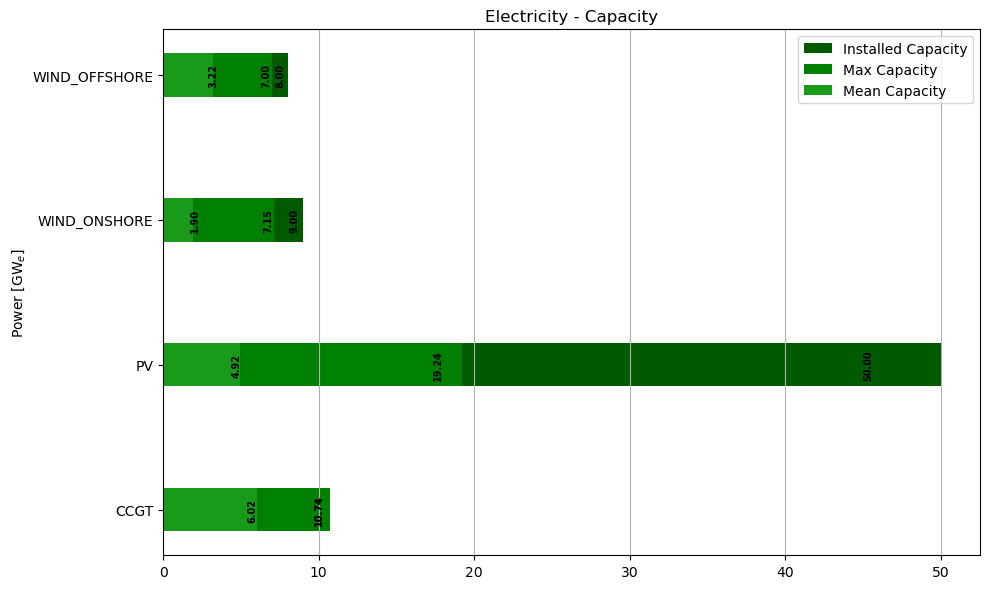

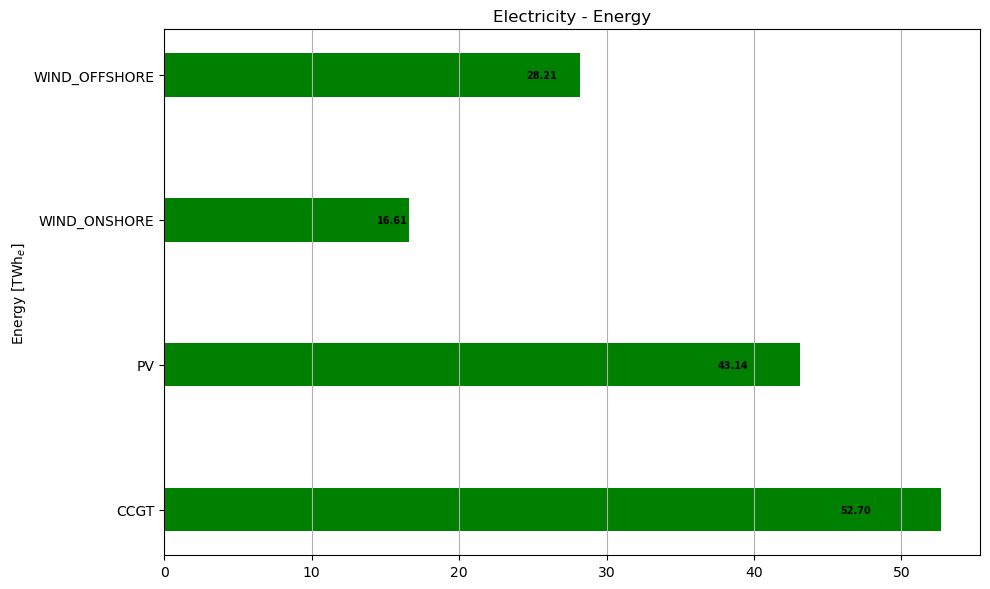

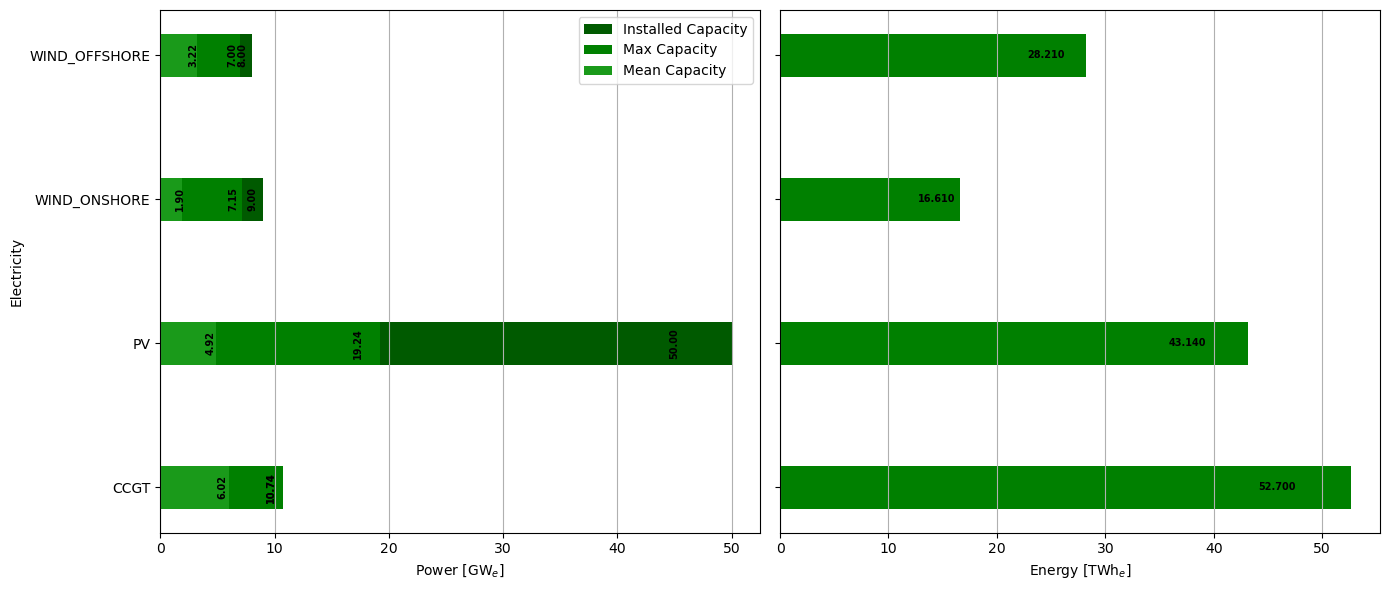

In [30]:
pf.bar_ploter_stack_dict(
    data=table,  
    color_palette = 'green',  
    cap_unit = 'Power [GW$_e$]',
    ener_unit = 'Energy [TWh$_e$]',
    commodity = 'Electricity',
    plot_folder = plot_folder) 

#### To merge dict

In [31]:
# merged_cluster_dict_base = {}
# merged_cluster_dict_new = {}
# cluster_prod_elec = pf.get_cluster_names_from_variable('e_balanced',Bel_cluster_dict)
# print(cluster_prod_elec) 

# for cluster in cluster_prod_elec:    
        
#         # print(colored(f'Cluster {cluster}:', 'white', 'on_red'))
#         # print('')
        
#         # Base:
#         # print(colored(f'Capacity installed for Electricity production for the base case:', 'white', 'on_magenta'))
#         nodes_elec_base, energy_quantity_elec_base, total_energy_elec_base, capacity_quantity_elec_base, max_capacity_elec_base, \
#         mean_capacity_elec_base, installed_capacity_elec_base, load_factor_elec_base, table_elec_base = pf.pow_energy_dict(
#             variable='e_produced',
#             cluster=cluster, 
#             name_capacity=name_capacity, 
#             name_capacity_0=name_capacity_0, 
#             name_capacity_max=name_capacity_max, 
#             time_horizon=time_horizon, 
#             unit_power='[GW]', 
#             unit_energy='[TWh]', 
#             dict=base_cluster_dict)
        
#         table_base = pf.transform_dict_into_table_several_column(table_elec_base)
#         # display(table_base)
#         merged_cluster_dict_base = pf.merge_dictionaries(merged_cluster_dict_base, table_base)
        
        
        
#         # New:
#         # print(colored(f'Capacity installed for Electricity production for the new case:', 'white', 'on_magenta'))
#         nodes_elec_new, energy_quantity_elec_new, total_energy_elec_new, capacity_quantity_elec_new, max_capacity_elec_new, \
#         mean_capacity_elec_new, installed_capacity_elec_new, load_factor_elec_new, table_elec_new = pf.pow_energy_dict(
#             variable='e_produced',
#             cluster=cluster, 
#             name_capacity=name_capacity, 
#             name_capacity_0=name_capacity_0, 
#             name_capacity_max=name_capacity_max, 
#             time_horizon=time_horizon, 
#             unit_power='[GW]', 
#             unit_energy='[TWh]', 
#             dict=Bel_cluster_dict)

#         table_new = pf.transform_dict_into_table_several_column(table_elec_new)
#         # display(table_new)
#         merged_cluster_dict_new = pf.merge_dictionaries(merged_cluster_dict_new, table_new)
        
        
# # display(merged_cluster_dict_base)
        
# pf.bar_ploter_stack_dict(
#             data = merged_cluster_dict_base,  
#             color_palette = 'orange', 
#             text_color = 'white',
#             cap_unit = 'Power [GW$_e$]',
#             ener_unit = 'Energy [TWh$_e$]',
#             commodity = 'Electricity',
#             is_power = 'no',
#             is_energy = 'no',
#             is_combined = 'yes',
#             plot_folder = plot_folder) 


# pf.bar_ploter_stack_dict(
#             data = merged_cluster_dict_new,  
#             color_palette = 'orange', 
#             text_color = 'white',
#             cap_unit = 'Power [GW$_e$]',
#             ener_unit = 'Energy [TWh$_e$]',
#             commodity = 'Electricity',
#             is_power = 'no',
#             is_energy = 'no',
#             is_combined = 'yes',
#             plot_folder = plot_folder) 

# Load duration curves

#### Load duration curved plot individually

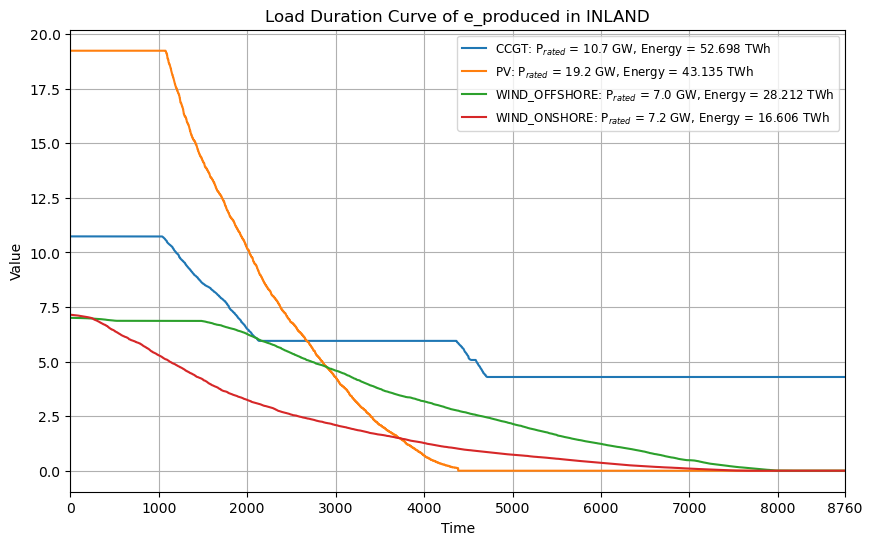

In [32]:
nodes_test = pf.get_cluster_subnodes_names_from_variable('e_produced', 'INLAND', Bel_cluster_dict) 

pf.load_duration_curves(data=node_test, 
                        xlabel='Time [h]',
                        ylabel='Electricity [GWh/h]',
                        title='Load Duration Curve of e_produced in INLAND',
                        unit_cap = 'GW',
                        unit_energy = 'TWh', 
                        is_together = 'no',  )

#### Aggregated load duration curves

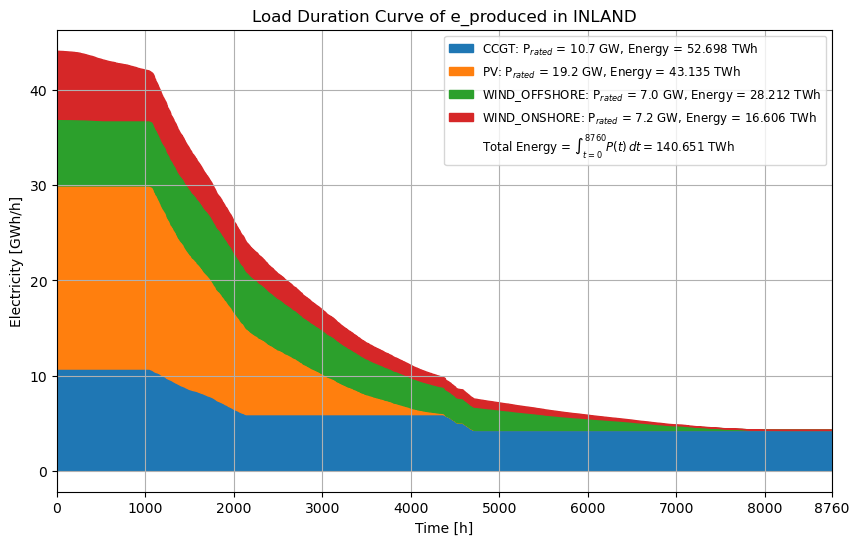

In [33]:
nodes_test = pf.get_cluster_subnodes_names_from_variable('e_produced', 'INLAND', Bel_cluster_dict) 

pf.load_duration_curves(data=node_test, 
                        xlabel='Time [h]',
                        ylabel='Electricity [GWh/h]',
                        title='Load Duration Curve of e_produced in INLAND',
                        unit_cap = 'GW',
                        unit_energy = 'TWh', 
                        is_together = 'yes', 
                        ener_quan="Energy")

# Main

In [34]:
cluster = pf.get_all_cluster_names(Bel_cluster_dict)
print(cluster)   

['DENMARK', 'DEUTSCHLAND', 'FRANCE', 'HV_OFF_ZB', 'HV_ZB_INL', 'INLAND', 'LUXEMBOURG', 'NETHERLANDS', 'OFFSHORE', 'PIPE_H2_OFF_ZB', 'PIPE_H2_ZB_INL', 'PIPE_NG_ZB_INL', 'UNITED_KINGDOM', 'ZEEBRUGGE']


### dual price

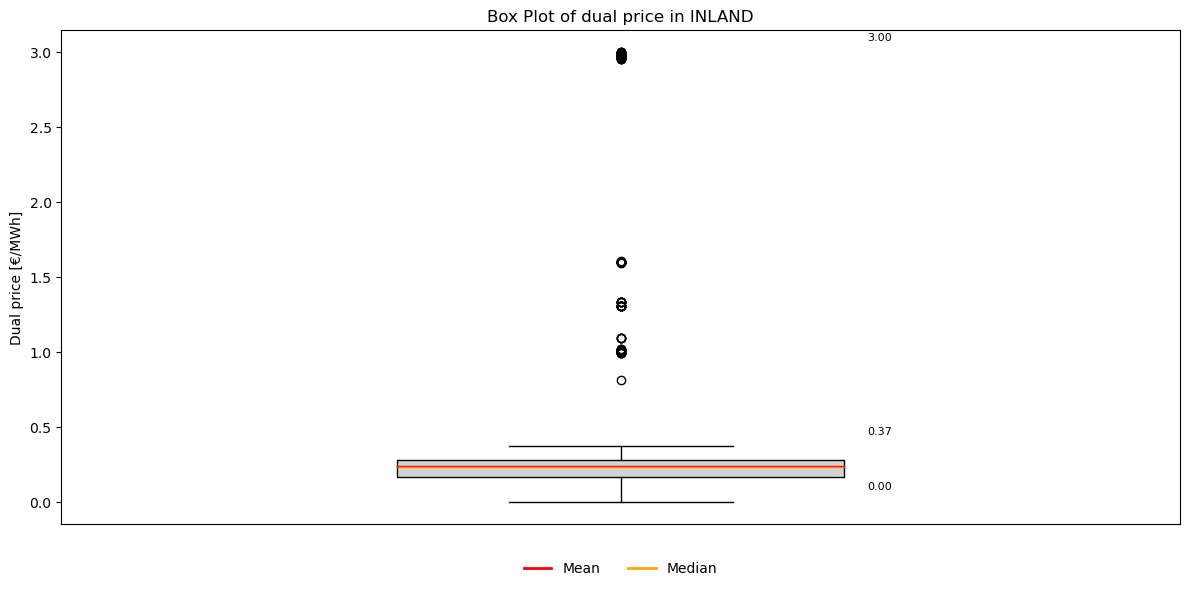

Node  Mean  Median  Min   Max    Q1    Q3  Min Outlier  Max Outlier
0       0.24    0.23  0.0  0.37  0.16  0.28          0.0          3.0

Node  Mean  Median  Min   Max    Q1    Q3  Min Outlier  Max Outlier
0       0.24    0.23  0.0  0.37  0.16  0.28          0.0          3.0

In [35]:
dual_price = Bel_cluster_dict['solution']['elements']['INLAND_BALANCE']['constraints']['electricity']['Pi']

dual_price_stat = pf.box_plot(
    data=dual_price,
    title='Box Plot of dual price in INLAND',
    y_label='Dual price [€/MWh]', 
    box_color='lightgray',
    mean_color='red',
    median_color='orange',
    widths=0.4,
    to_plot='yes',
    to_annotate='yes',
    what_to_annotate=['min', 'max', 'max_outlier']
)

display(dual_price_stat)

#### Test

In [36]:
elec = pf.get_all_from_variable_and_parameter(Bel_cluster_dict, variable = ['e_produced','e_charged','e_discharged','e_consumed', 'e_imported', 'e_exported'], to_print="no") 
# elec = get_all_from_variable_and_parameter(Bel_cluster_dict, variable = ['e_produced','e_charged','e_discharged','e_consumed'], cluster = ['INLAND', 'OFFSHORE', "ZEEBRUGGE" ], to_print="no" )
 
print(elec.keys())   
print(elec['variables'].keys())
print(elec['variables']['INLAND'].keys())
print('')
 

elec_node = elec['variables']

elec_table = pf.transform_dict_into_table_several_column(elec_node, zero_print='no')
display(elec_table)

 

dict_keys(['variables', 'capacities', 'parameters', 'global_parameters'])
dict_keys(['DENMARK', 'DEUTSCHLAND', 'FRANCE', 'HV_OFF_ZB', 'HV_ZB_INL', 'INLAND', 'LUXEMBOURG', 'NETHERLANDS', 'OFFSHORE', 'PIPE_H2_OFF_ZB', 'PIPE_H2_ZB_INL', 'PIPE_NG_ZB_INL', 'UNITED_KINGDOM', 'ZEEBRUGGE'])
dict_keys(['e_produced', 'e_charged', 'e_discharged', 'e_consumed'])



DENMARK  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported    [0.20262198, 0.20283065, 0.20398065, 0.2057799...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                    DEUTSCHLAND  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9...   
e_imported    [0.5228939177, 0.524741819, 0.5305620648999999...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                         FRANCE  HV_OFF_ZB  \
e_produced    {'NUCLEAR': [15.048, 15.2, 15.048, 14.896, 15....        NaN   
e_imported    [1.0509202796203931, 0.0, 0.0, 0.0, 0.0, 0.0, ...        NaN   
e_charged                                                   NaN        NaN   
e_discharged                                                NaN        NaN   
e_consumed                                                  NaN        NaN   

              HV_ZB_INL                                             INLAND  \
e_produced          NaN  {'BIOMASS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported          NaN                                                NaN   
e_charged           NaN  {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_discharged        NaN  {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_consumed          NaN  {'BIOETH_PLANTS': [0.0, 0.0, 0.0, 0.0, 0.0, 0....   

                                                     LUXEMBOURG  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported    [9.879000000000001e-06, 3.7380000000000005e-06...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                    NETHERLANDS  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported    [0.49743128959999994, 0.5050783832, 0.51035028...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                       OFFSHORE  \
e_produced    {'FUEL_CELLS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
e_imported                                                  NaN   
e_charged     {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_discharged  {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_consumed    {'DESALINATION': [0.00011634909949899736, 0.00...   

              PIPE_H2_OFF_ZB  PIPE_H2_ZB_INL  PIPE_NG_ZB_INL  \
e_produced               NaN             NaN             NaN   
e_imported               NaN             NaN             NaN   
e_charged                NaN             NaN             NaN   
e_discharged             NaN             NaN             NaN   
e_consumed               NaN             NaN             NaN   

                                                 UNITED_KINGDOM  \
e_produced    {'NUCLEAR': [5.039999999999999, 5.095999999999...   
e_imported    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                      ZEEBRUGGE  
e_produced    {'FUEL_CELLS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
e_imported                                                  NaN  
e_charged     {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  
e_discharged  {'BATTERIES': [1.1041580849400074, 0.

DENMARK  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported    [0.20262198, 0.20283065, 0.20398065, 0.2057799...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                    DEUTSCHLAND  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9...   
e_imported    [0.5228939177, 0.524741819, 0.5305620648999999...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                         FRANCE  HV_OFF_ZB  \
e_produced    {'NUCLEAR': [15.048, 15.2, 15.048, 14.896, 15....        NaN   
e_imported    [1.0509202796203931, 0.0, 0.0, 0.0, 0.0, 0.0, ...        NaN   
e_charged                                                   NaN        NaN   
e_discharged                                                NaN        NaN   
e_consumed                                                  NaN        NaN   

              HV_ZB_INL                                             INLAND  \
e_produced          NaN  {'BIOMASS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported          NaN                                                NaN   
e_charged           NaN  {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_discharged        NaN  {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_consumed          NaN  {'BIOETH_PLANTS': [0.0, 0.0, 0.0, 0.0, 0.0, 0....   

                                                     LUXEMBOURG  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported    [9.879000000000001e-06, 3.7380000000000005e-06...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                    NETHERLANDS  \
e_produced    {'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...   
e_imported    [0.49743128959999994, 0.5050783832, 0.51035028...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                       OFFSHORE  \
e_produced    {'FUEL_CELLS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
e_imported                                                  NaN   
e_charged     {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_discharged  {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
e_consumed    {'DESALINATION': [0.00011634909949899736, 0.00...   

              PIPE_H2_OFF_ZB  PIPE_H2_ZB_INL  PIPE_NG_ZB_INL  \
e_produced               NaN             NaN             NaN   
e_imported               NaN             NaN             NaN   
e_charged                NaN             NaN             NaN   
e_discharged             NaN             NaN             NaN   
e_consumed               NaN             NaN             NaN   

                                                 UNITED_KINGDOM  \
e_produced    {'NUCLEAR': [5.039999999999999, 5.095999999999...   
e_imported    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
e_charged                                                   NaN   
e_discharged                                                NaN   
e_consumed                                                  NaN   

                                                      ZEEBRUGGE  
e_produced    {'FUEL_CELLS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
e_imported                                                  NaN  
e_charged     {'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  
e_discharged  {'BATTERIES': [1.1041580849400074, 0.

Demand keys
dict_keys(['demand_el', 'demand_el_ht', 'daily_demand_for_electric_vehicle'])

Cluster keys
dict_keys(['e_produced', 'e_charged', 'e_discharged', 'e_consumed'])



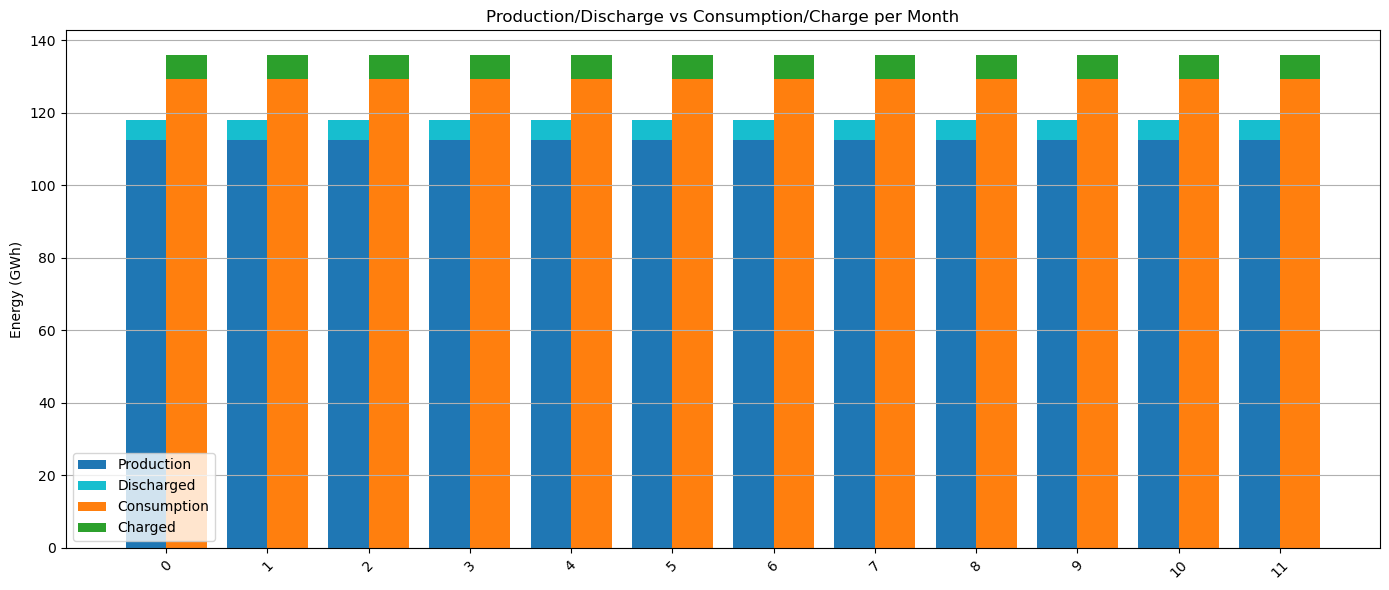

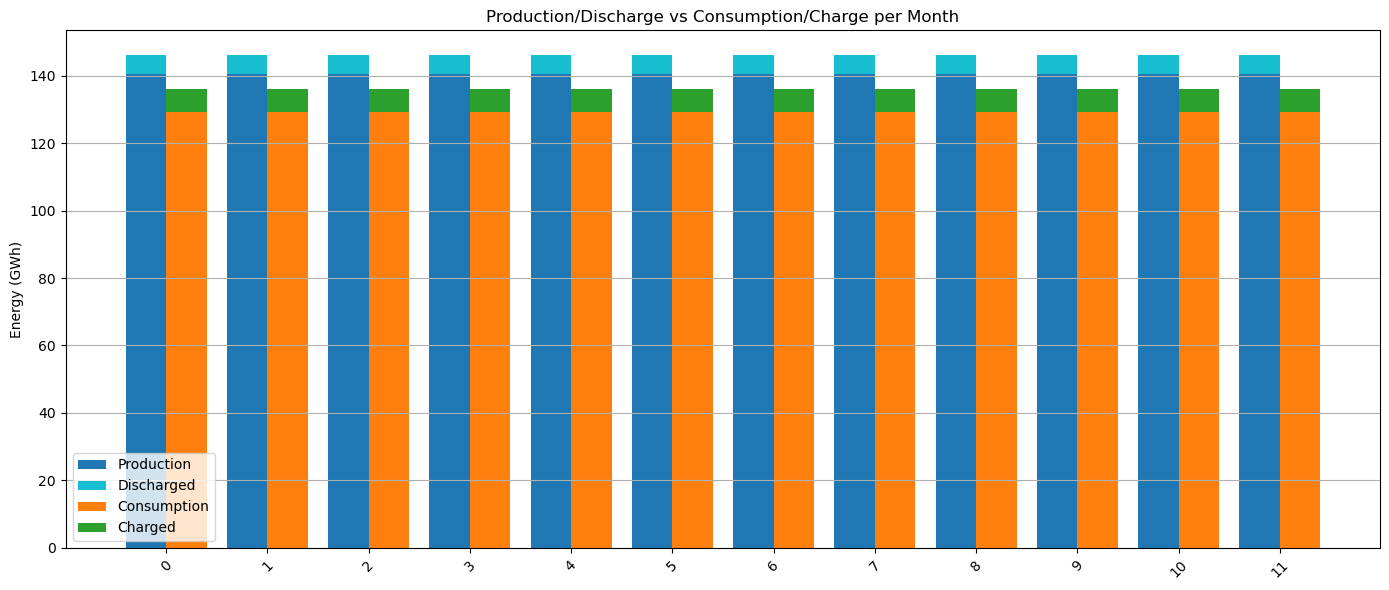

In [37]:
# test_var = pf.get_timeseries_dict_from_all_cluster(Bel_cluster_dict, parameter=['demand_el'])
test_var = pf.get_timeseries_of_global_parameters(Bel_cluster_dict, ['demand_el', 'demand_el_ht', 'daily_demand_for_electric_vehicle'])
print('Demand keys')
print(test_var.keys())
print('')

elec_node_inland = elec_node['INLAND'] 
print('Cluster keys')
print(elec_node_inland.keys())
print('') 



# display(elec_node_inland)      
pf.bar_ploter_stack_time(data_prod=elec_node_inland['e_produced'] ,data_cons= elec_node_inland['e_consumed'] ,data_demand= test_var,
                      data_charged= elec_node_inland['e_charged'],data_discharged= elec_node_inland['e_discharged'])


elec_node['INLAND']['e_produced'] = pf.merge_dictionaries(elec_node['INLAND']['e_produced'], elec_node['OFFSHORE']['e_produced'])
pf.bar_ploter_stack_time(data_prod=elec_node_inland['e_produced'] ,data_cons= elec_node_inland['e_consumed'] ,data_demand= test_var,
                      data_charged= elec_node_inland['e_charged'],data_discharged= elec_node_inland['e_discharged'])


In [38]:
print(elec_node_inland['e_produced'].keys())
pf.transform_dict_into_table_several_column(table)

dict_keys(['BIOMASS', 'CCGT', 'CHP', 'FUEL_CELLS', 'NUCLEAR', 'OCGT', 'PV', 'WASTE', 'WIND_ONSHORE', 'WIND_OFFSHORE'])


BIOMASS   CCGT  CHP  FUEL_CELLS  NUCLEAR  OCGT  \
Total energy [TWh]           0.0  52.70  0.0         0.0      0.0   0.0   
Max capacity [GW]            0.0  10.74  0.0         0.0      0.0   0.0   
Min capacity [GW]            0.0   4.29  0.0         0.0      0.0   0.0   
Mean capacity [GW]           0.0   6.02  0.0         0.0      0.0   0.0   
Installed capacity [GW]      0.0  10.74  0.0         0.0      0.0   0.0   
Load factor                  0.0   0.56  0.0         0.0      0.0   0.0   

                            PV  WASTE  WIND_ONSHORE  WIND_OFFSHORE  
Total energy [TWh]       43.14    0.0         16.61          28.21  
Max capacity [GW]        19.24    0.0          7.15           7.00  
Min capacity [GW]         0.00    0.0          0.00           0.00  
Mean capacity [GW]        4.92    0.0          1.90           3.22  
Installed capacity [GW]  50.00    0.0          9.00           8.00  
Load factor               0.10    0.0          0.21           0.40

BIOMASS   CCGT  CHP  FUEL_CELLS  NUCLEAR  OCGT  \
Total energy [TWh]           0.0  52.70  0.0         0.0      0.0   0.0   
Max capacity [GW]            0.0  10.74  0.0         0.0      0.0   0.0   
Min capacity [GW]            0.0   4.29  0.0         0.0      0.0   0.0   
Mean capacity [GW]           0.0   6.02  0.0         0.0      0.0   0.0   
Installed capacity [GW]      0.0  10.74  0.0         0.0      0.0   0.0   
Load factor                  0.0   0.56  0.0         0.0      0.0   0.0   

                            PV  WASTE  WIND_ONSHORE  WIND_OFFSHORE  
Total energy [TWh]       43.14    0.0         16.61          28.21  
Max capacity [GW]        19.24    0.0          7.15           7.00  
Min capacity [GW]         0.00    0.0          0.00           0.00  
Mean capacity [GW]        4.92    0.0          1.90           3.22  
Installed capacity [GW]  50.00    0.0          9.00           8.00  
Load factor               0.10    0.0          0.21           0.40